# **Imports**

Below are the imports used in the **notebook**.

In [1]:
# Common
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Processing 
from sklearn.impute import SimpleImputer

# **Data - Loading**

First we need to **load the data**.

In [2]:
# Load File
df = pd.read_csv('../input/planet-dataset/planets.csv')

# A quick View
df.head(8)

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,...,88,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,687,24.1,1.8,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,4331,13.1,1.3,0.049,3.100,-110,Unknown,79,Yes,Yes
5,Saturn,"Golden, Brown, and Blue-Grey",568.000,120536,687,9.0,35.5,10.7,10.7,1432.0,...,"10,747",9.7,2.5,0.052,26.700,-140,Unknown,82,Yes,Yes
6,Uranus,Blue-Green,86.800,51118,1270,8.7,21.3,-17.2,17.2,2867.0,...,"30,589",6.8,0.8,0.047,97.800,-195,Unknown,27,Yes,Yes
7,Neptune,Blue,102.000,49528,1638,11.0,23.5,16.1,16.1,4515.0,...,"59,800",5.4,1.8,0.010,28.300,-200,Unknown,14,Yes,Yes


# **Data Info**

Let's note some basic but important information about the data.

In [3]:
size = len(df)
columns = df.columns
n_columns = len(columns)

print(f"Total Number of Columns : {n_columns}")

Total Number of Columns : 22


We have to tackle 22 columns,

In [4]:
columns

Index(['Planet', 'Color', 'Mass (10^24kg)', 'Diameter (km)',
       'Density (kg/m^3)', 'Surface Gravity(m/s^2)', 'Escape Velocity (km/s)',
       'Rotation Period (hours)', 'Length of Day (hours)',
       'Distance from Sun (10^6 km)', 'Perihelion (10^6 km)',
       'Aphelion (10^6 km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (degrees)',
       'Orbital Eccentricity', 'Obliquity to Orbit (degrees)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Planet                         8 non-null      object 
 1   Color                          8 non-null      object 
 2   Mass (10^24kg)                 8 non-null      float64
 3   Diameter (km)                  8 non-null      int64  
 4   Density (kg/m^3)               8 non-null      int64  
 5   Surface Gravity(m/s^2)         8 non-null      float64
 6   Escape Velocity (km/s)         8 non-null      float64
 7   Rotation Period (hours)        8 non-null      float64
 8   Length of Day (hours)          8 non-null      float64
 9   Distance from Sun (10^6 km)    8 non-null      float64
 10  Perihelion (10^6 km)           8 non-null      float64
 11  Aphelion (10^6 km)             8 non-null      float64
 12  Orbital Period (days)          8 non-null      object 

That's great the **dataset does not have any Null value** and all the **data points are numerical**.

# **Mass EDA**

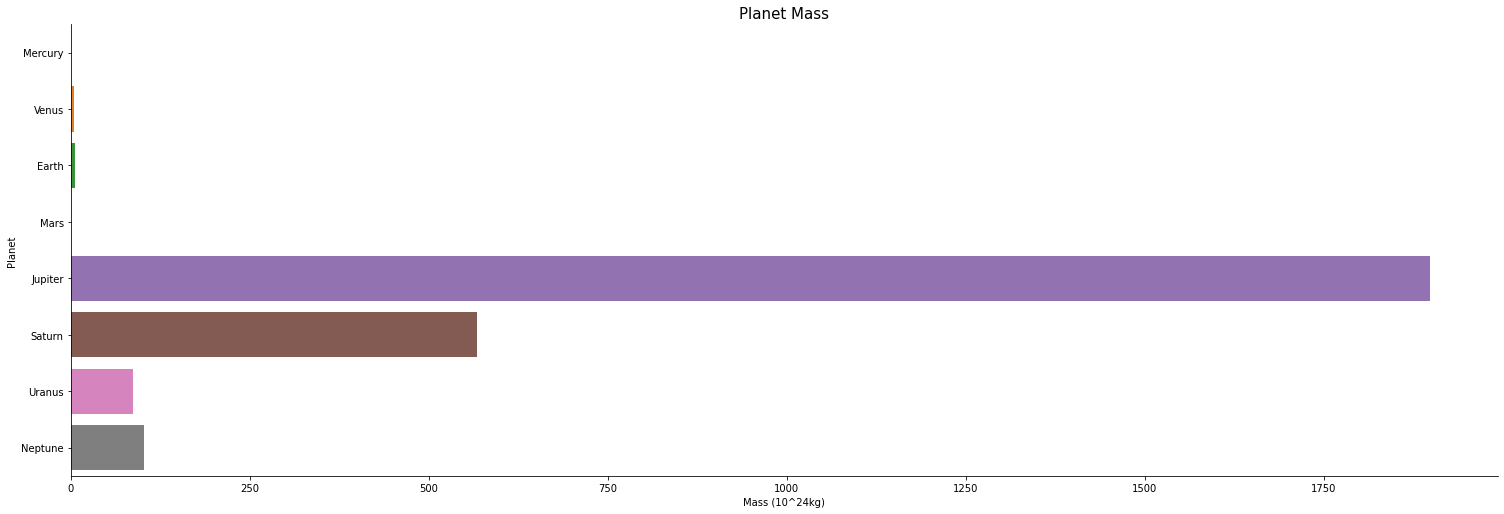

In [6]:
sns.catplot(
    data=df,
    y='Planet',
    x='Mass (10^24kg)',
    kind='bar',
    aspect=3,
    height=7
)
plt.title("Planet Mass", fontsize=15)
plt.show()

No doubt **Jupiter has the highest mass**, afterall these are **gas giants**.

In [7]:
# Calculate Values
names = df['Planet']
values = df['Mass (10^24kg)']

# Plot
fig = px.pie(names=names, values=values, title="Planet Mass", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Earth** is not even the 1% and **Jupiter holds more than 70% of the total mass** followed by **Saturn(21.3%)** and **Neptune(3.83%)**.

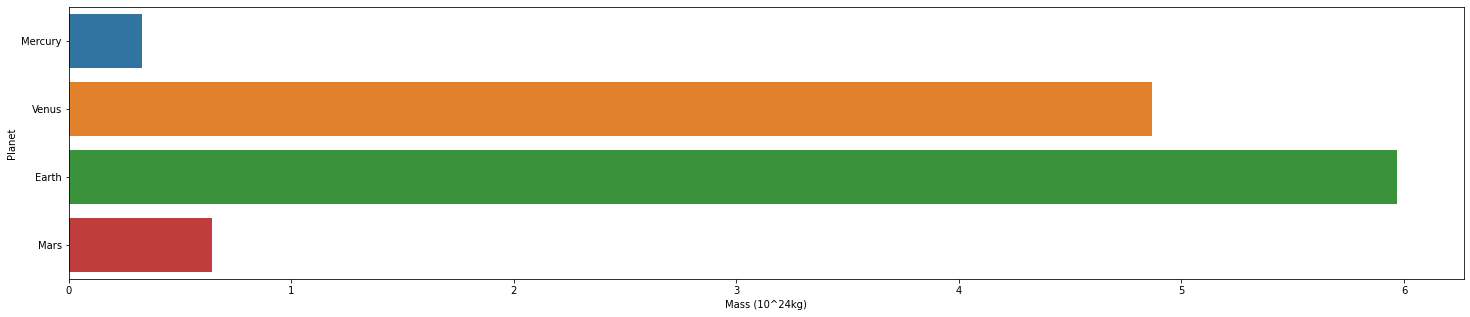

In [8]:
# Calculate Values
names = df['Planet'][:4]
values = df['Mass (10^24kg)'][:4]

# Plot
fig = px.pie(names=names, values=values, title="Rocky Planet's Mass Distribution", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth alone** has more than **50% of the total mass** of the **rocky planets**.

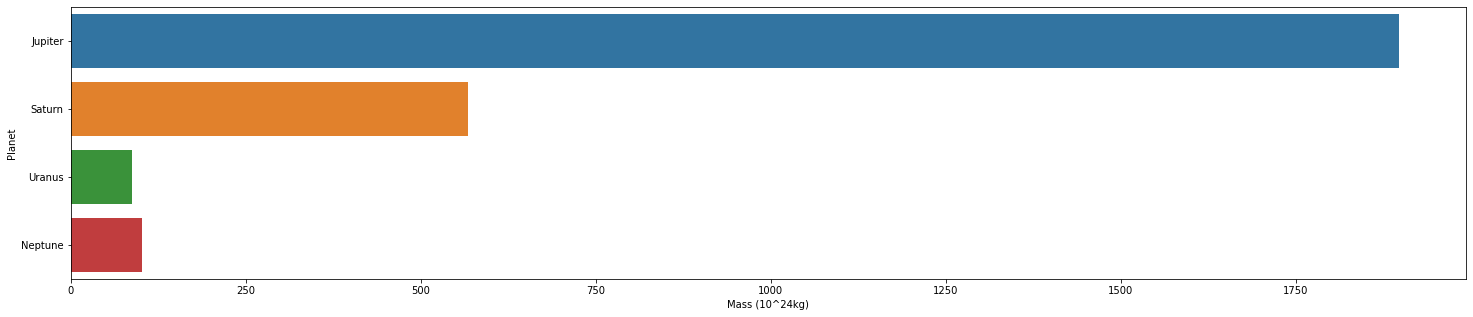

In [9]:
# Calculate Values
names = df['Planet'][4:]
values = df['Mass (10^24kg)'][4:]

# Plot
fig = px.pie(names=names, values=values, title="Gas Planet's Mass Distribution", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter alone** has more than **71% of the total mass** of the **gas giants**.

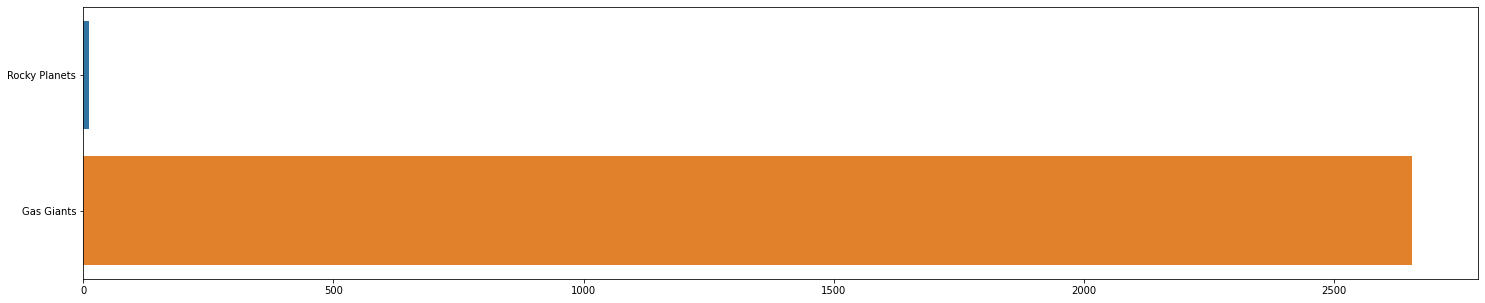

In [10]:
# Calculate Values
rocky_planets = sum(df['Mass (10^24kg)'].to_numpy()[:4])
gas_planets = sum(df['Mass (10^24kg)'].to_numpy()[4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title="Gas Giants vs Rocky Planets Mass", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Even if we **combine the total mass of all the rocky planets** that's **still not even 1% off the total mass**.

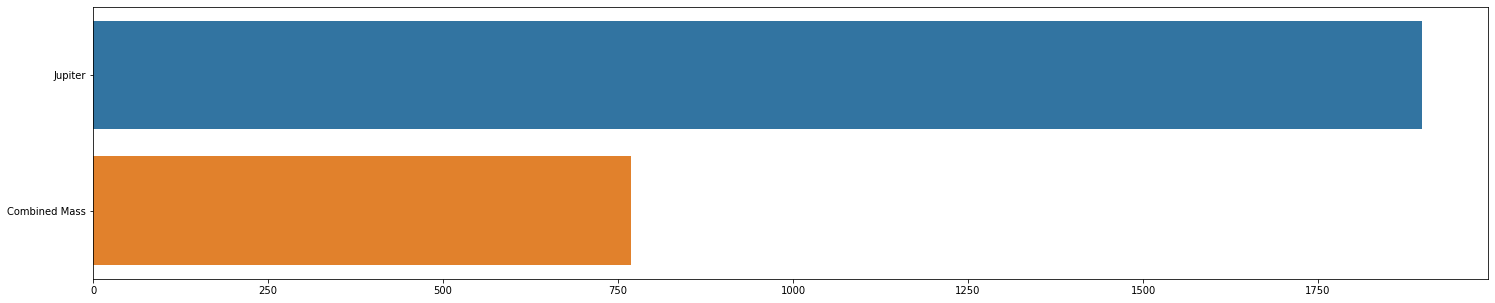

In [11]:
# Calculate Values
jupiter = df['Mass (10^24kg)'].to_numpy()[4]
combined = sum(df['Mass (10^24kg)']) - jupiter

# Calculate Values
names = ["Jupiter", "Combined Mass"]
values = [jupiter, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs All Combined Mass", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** has **more mass** than the **combined mass** of **all other planets**.

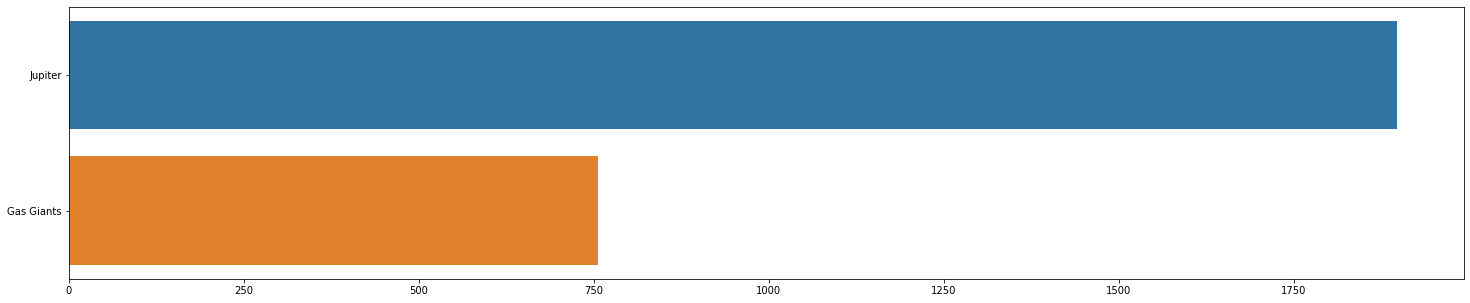

In [12]:
# Calculate
jupiter = df['Mass (10^24kg)'][4]
other_gas_planets = sum(df['Mass (10^24kg)'][4:]) - jupiter

# Frame Values
names = ["Jupiter", "Gas Giants"]
values = [jupiter, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs Other Gas Planets Mass", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** has **more mass** than the **combined mass** of **all other Gas Giants**.

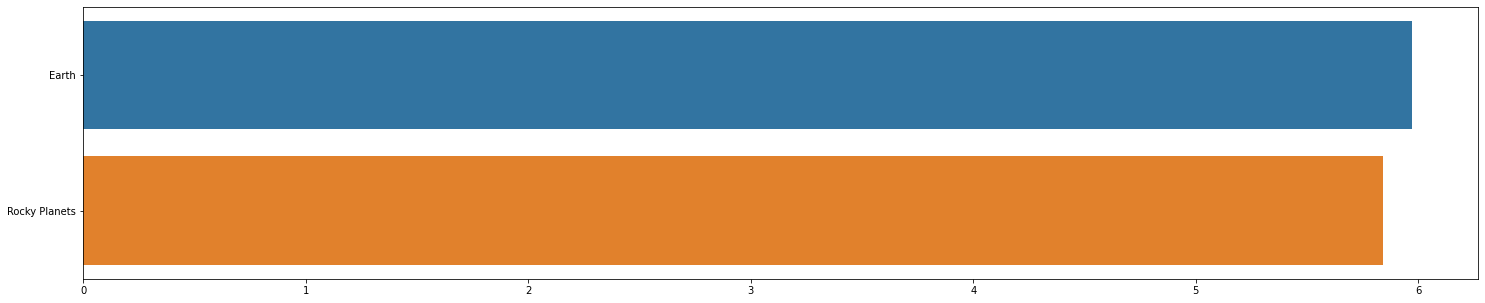

In [13]:
# Calculate
earth = df['Mass (10^24kg)'][2]
other_rocky_planets = sum(df['Mass (10^24kg)'][:4]) - earth

# Frame Values
names = ["Earth", "Rocky Planets"]
values = [earth, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title="Earth vs Other Rocky Planets Mass", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth alone** has almost **50% of the total mass** of all **rocky planets**.

---

# **Diameter EDA**

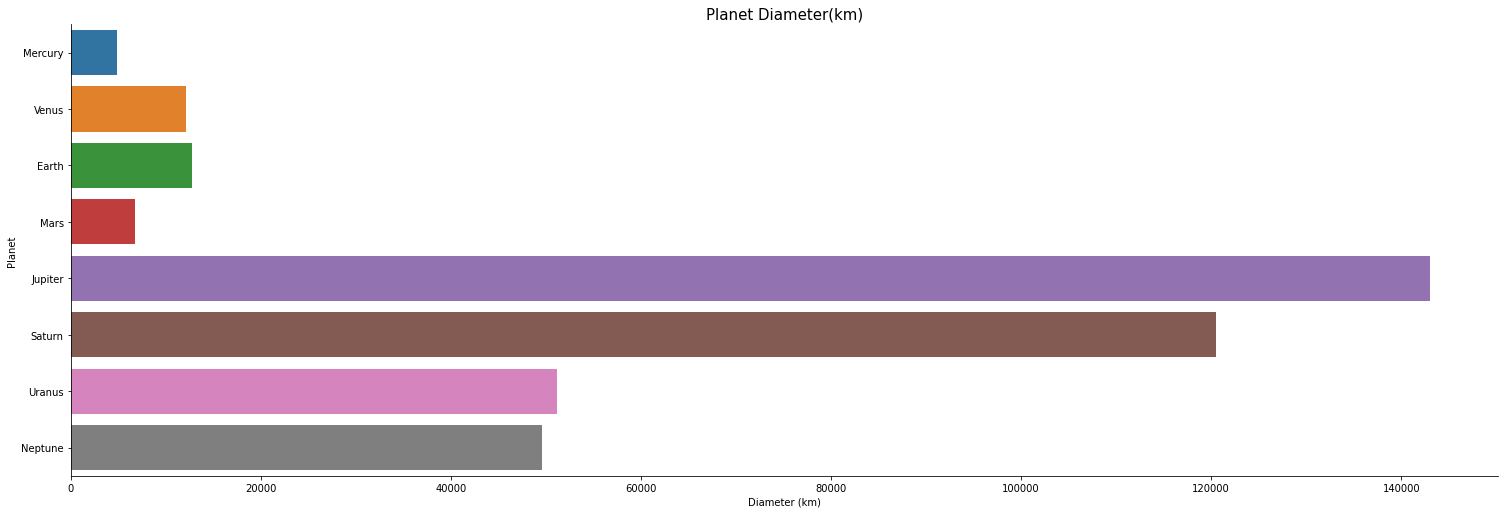

In [14]:
sns.catplot(
    data=df,
    y='Planet',
    x='Diameter (km)',
    kind='bar',
    aspect=3,
    height=7
)
plt.title("Planet Diameter(km)", fontsize=15)
plt.show()

So now you know why they are called the **Gas Giants**, they are **enormous in size**.

In [15]:
# Calculate Values
names = df['Planet']
values = df['Diameter (km)']

# Plot
fig = px.pie(names=names, values=values, title="Planet Diameter(km)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Gas Giants** have **highest diameter** because they are **enormous in size**.

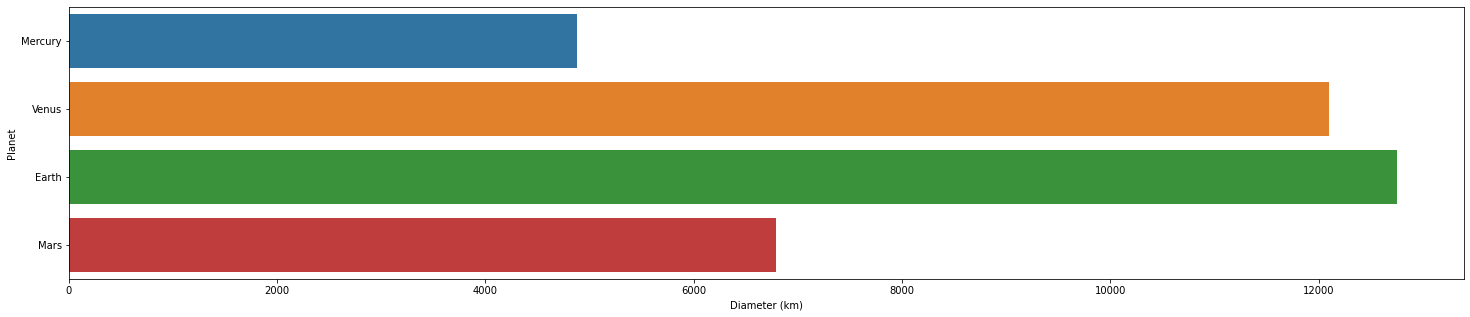

In [16]:
# Calculate Values
names = df['Planet'][:4]
values = df['Diameter (km)'][:4]

# Plot
fig = px.pie(names=names, values=values, title="Rocky Planet's Diameter(km) Distribution", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

 **Earth and Venus have almost the same size** thats why it is called as **Earth's Twin**.

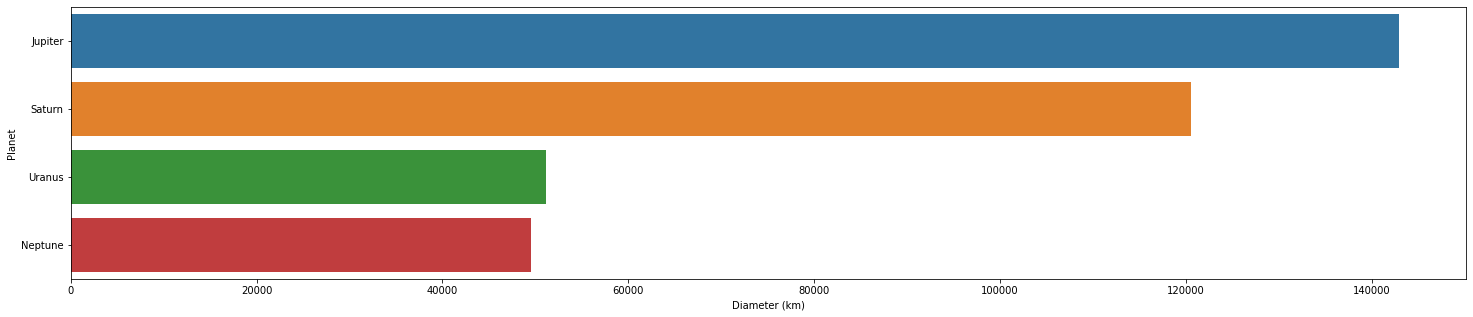

In [17]:
# Calculate Values
names = df['Planet'][4:]
values = df['Diameter (km)'][4:]

# Plot
fig = px.pie(names=names, values=values, title="Gas Planet's Diameter(km) Distribution", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

The diameter of **Saturn and Jupiter are roughly the same** but **Jupiter is bigger than Saturn**.

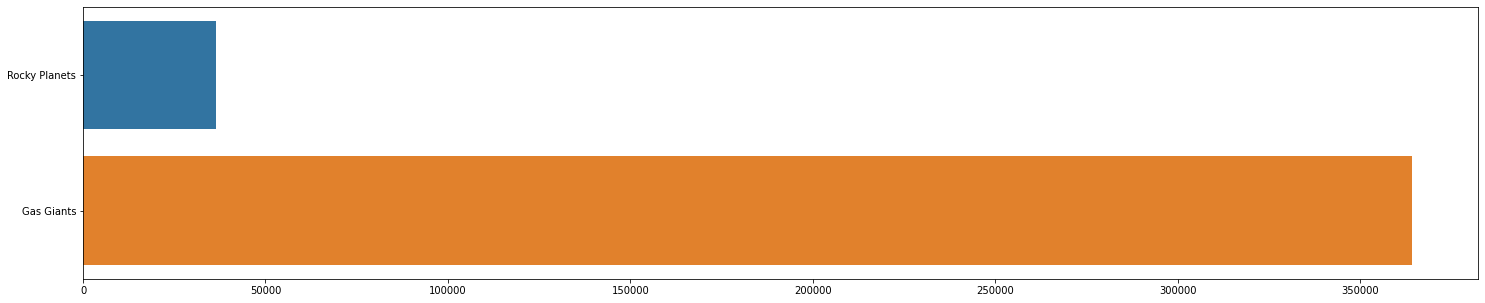

In [18]:
# Calculate Values
rocky_planets_diameter = sum(df['Diameter (km)'].to_numpy()[:4])
gas_planets_diameter = sum(df['Diameter (km)'].to_numpy()[4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets_diameter, gas_planets_diameter]

# Plot
fig = px.pie(names=names, values=values, title="Rocky vs Gas Giants Planet Diameter (km)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

As the **name suggest**, **Gas Giants** are **really the giants**. More than **90% of the total size(diameter)** is of the **gas giants**.

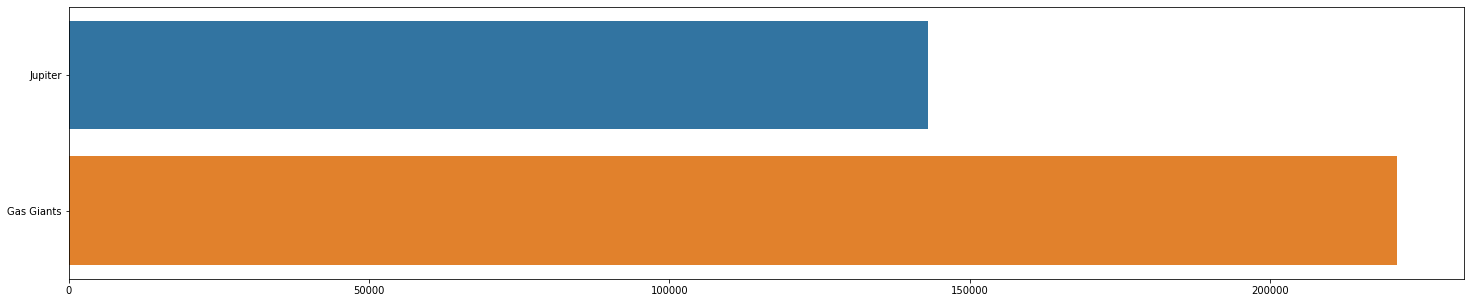

In [19]:
# Calculate
jupiter = df['Diameter (km)'][4]
other_gas_planets = sum(df['Diameter (km)'][4:]) - jupiter

# Frame Values
names = ["Jupiter", "Gas Giants"]
values = [jupiter, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs Gas Planets Diameter(km)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter alone** holds around **40% of the total diameter** of all **gas giants**.

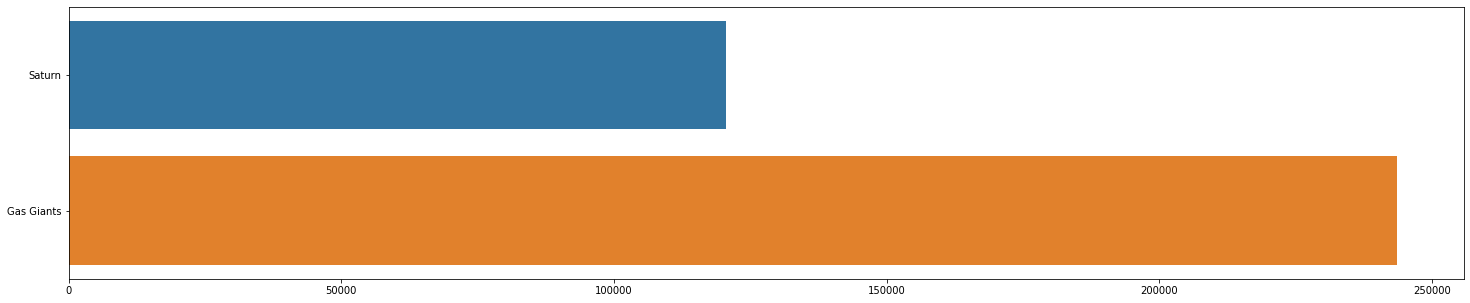

In [20]:
# Calculate
saturn = df['Diameter (km)'][5]
other_gas_planets = sum(df['Diameter (km)'][4:]) - saturn

# Frame Values
names = ["Saturn", "Gas Giants"]
values = [saturn, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Saturn vs Gas Planets Diameter(km)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

After Jupiter, **Saturn** make up around **33% of the total diameter** of all **gas giants**.

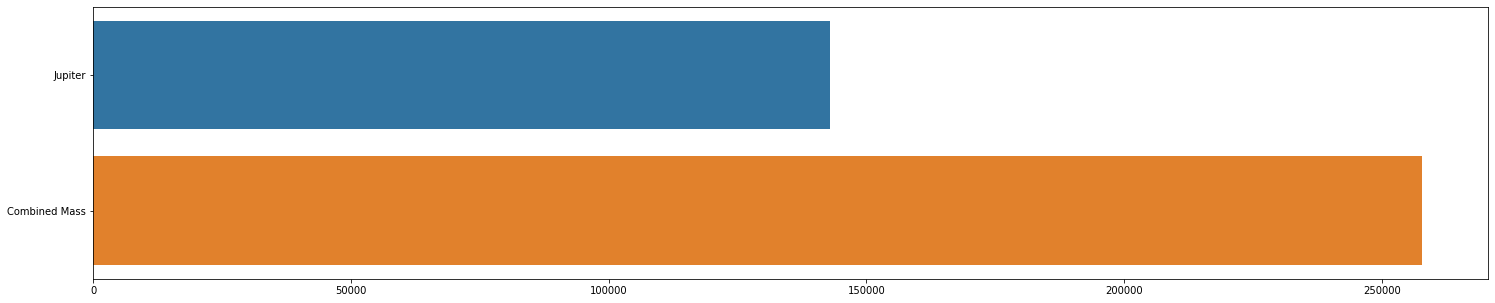

In [21]:
# Calculate Values
jupiter = df['Diameter (km)'].to_numpy()[4]
combined = sum(df['Diameter (km)']) - jupiter

# Calculate Values
names = ["Jupiter", "Combined Mass"]
values = [jupiter, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs All Combined Diameter", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** alone makes up around **35% of the total diameter** of **all planets**.

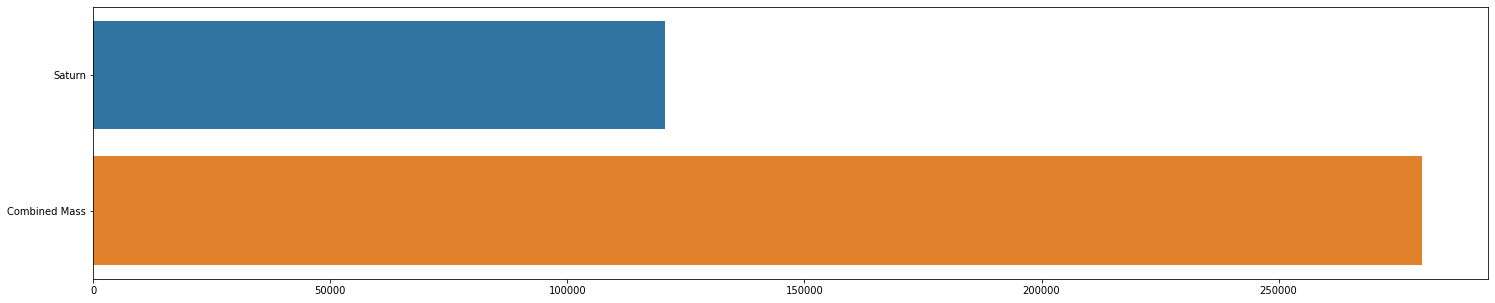

In [22]:
# Calculate Values
Saturn = df['Diameter (km)'].to_numpy()[5]
combined = sum(df['Diameter (km)']) - Saturn

# Calculate Values
names = ["Saturn", "Combined Mass"]
values = [Saturn, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Saturn vs All Combined Diameter", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Saturn** is just a **little behind from Jupiter**, otherwise the results are **roughly the same**.

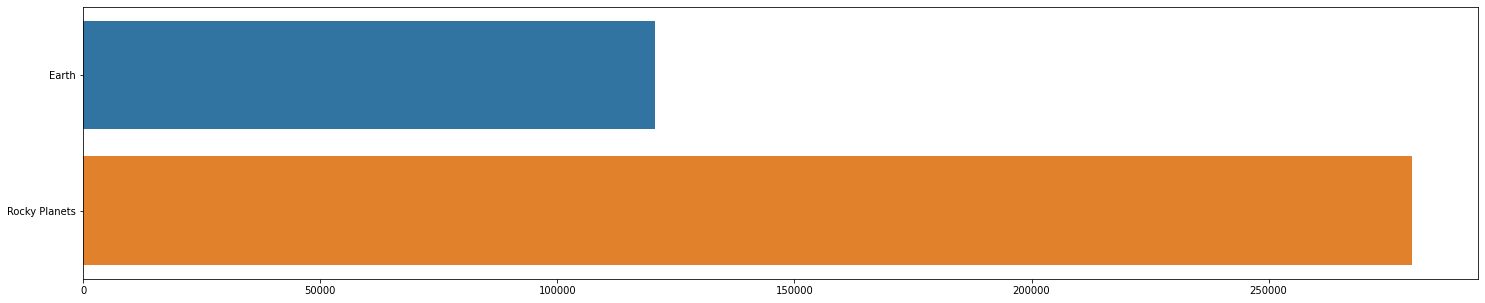

In [23]:
# Calculate Values
Earth = df['Diameter (km)'].to_numpy()[5]
rocky_planets = sum(df['Diameter (km)']) - Earth

# Calculate Values
names = ["Earth", "Rocky Planets"]
values = [Earth, rocky_planets]

# Pie Plot
fig = px.pie(names=names, values=values, title="Earth vs Rocky Planets Diameter", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Just like **Jupiter and Saturn**, **Earth** also makes up around **30%** of the **total diameter** of **all rocky planets**.

---

# **Density EDA**

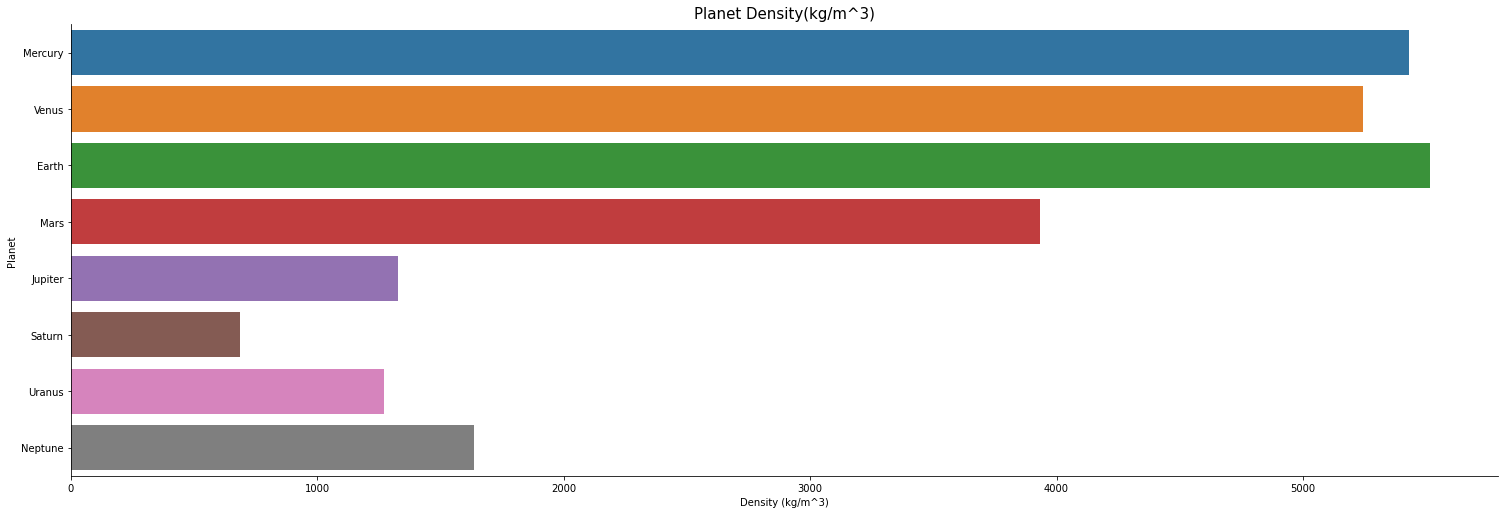

In [24]:
sns.catplot(
    data=df,
    y='Planet',
    x='Density (kg/m^3)',
    kind='bar',
    aspect=3,
    height=7
)
plt.title("Planet Density(kg/m^3)", fontsize=15)
plt.show()

In [25]:
# Calculate Values
names = df['Planet']
values = df['Density (kg/m^3)']

# Plot
fig = px.pie(names=names, values=values, title="Planet Density (kg/m^3)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

Here, the **whole dominance** of **Gas Giants** gets **flipped** because they are made up of **gases** which are **not dense** whereas **rocky planets** are **highly dense**.

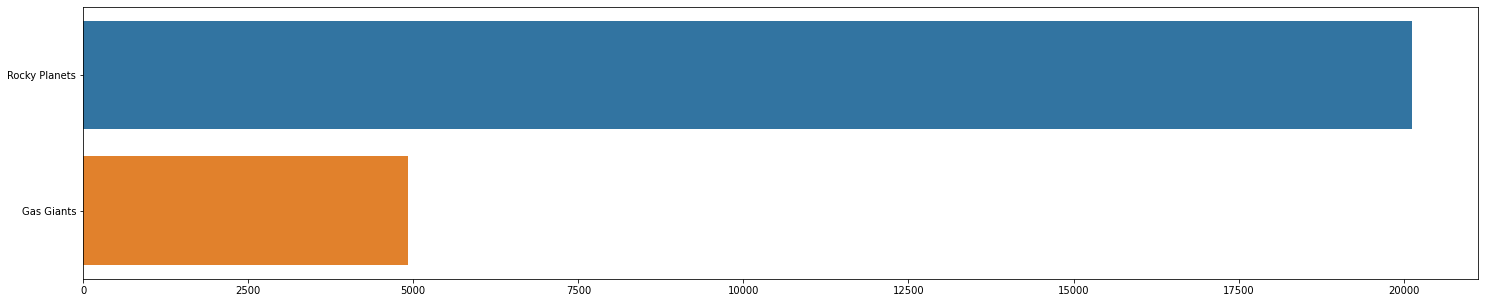

In [26]:
# Calculate Values
rocky_planets = sum(df['Density (kg/m^3)'].to_numpy()[:4])
gas_planets = sum(df['Density (kg/m^3)'].to_numpy()[4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title="Rocky vs Gas Giants Planet Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

The **total density** of **gas giants** is just **20%** of the **total density of all planets**. This is because **rocky planets** are made up of **Rocks(+metals)** which are dense than **gas**.

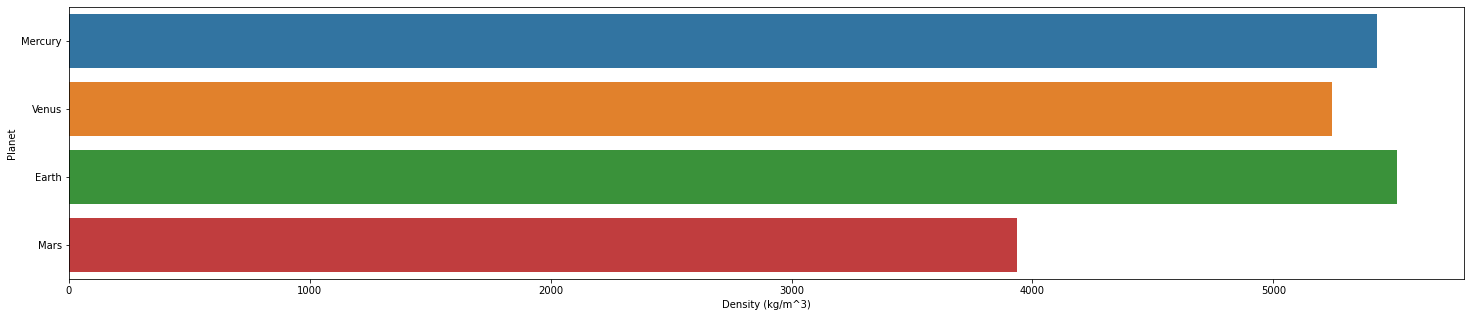

In [27]:
# Calculate Values
names = df['Planet'][df['Density (kg/m^3)'][:4].index]
values = df['Density (kg/m^3)'][:4]

# Plot
fig = px.pie(names=names, values=values, title="Rocky Planets Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

All the **rocky planets** have almost a **25% of total density**.

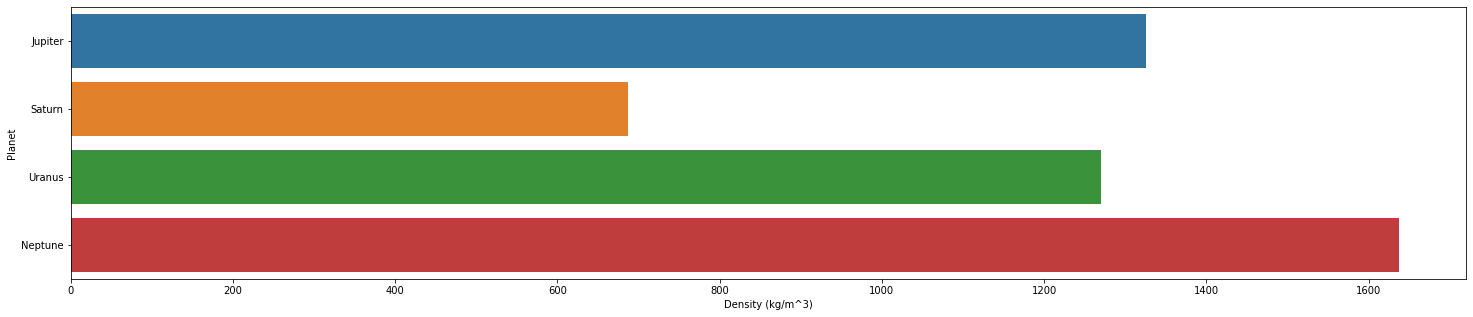

In [28]:
# Calculate Values
names = df['Planet'][df['Density (kg/m^3)'][4:].index]
values = df['Density (kg/m^3)'][4:]

# Plot
fig = px.pie(names=names, values=values, title="Gas Planets Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Neptune** being made up of **ice particles** has **more density**.

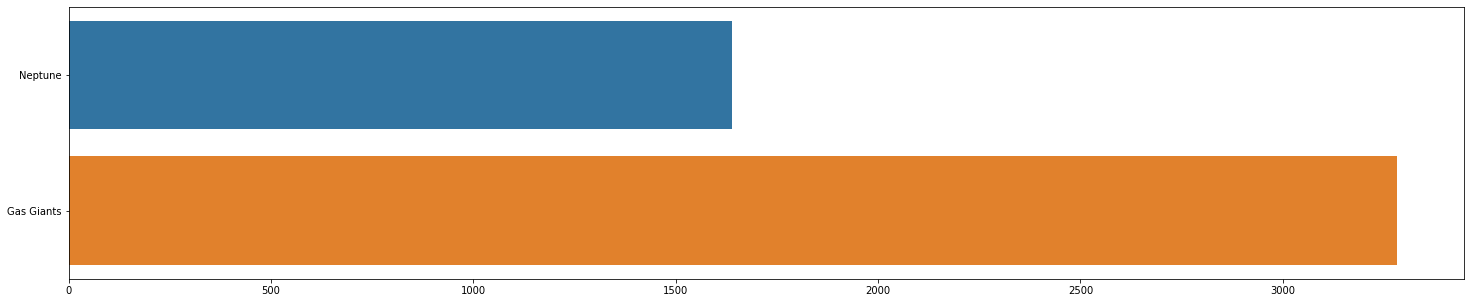

In [29]:
# Calculate
neptune = df['Density (kg/m^3)'][7]
other_gas_planets = sum(df['Density (kg/m^3)'][4:]) - neptune

# Frame Values
names = ["Neptune", "Gas Giants"]
values = [neptune, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Neptune vs Other Gas Planets Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Neptune** makes around **33% of the total density** of all **gas giants**.

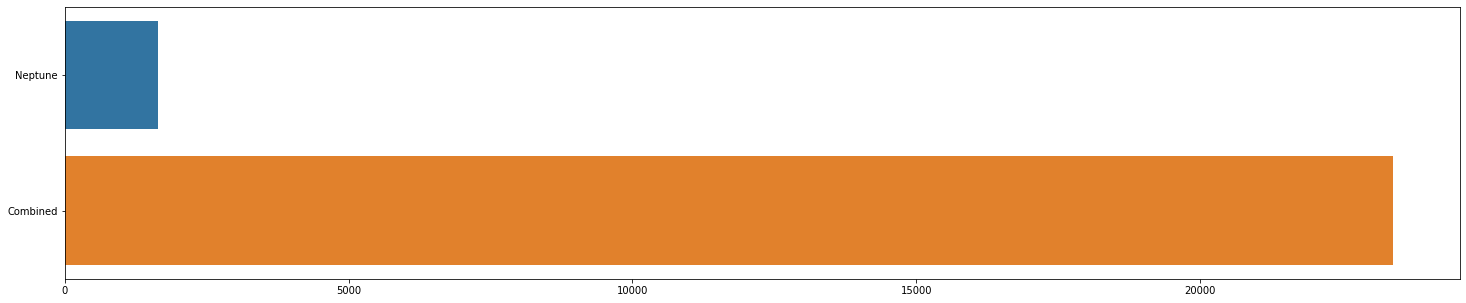

In [30]:
# Calculate Values
Neptune = df['Density (kg/m^3)'].to_numpy()[7]
combined = sum(df['Density (kg/m^3)']) - Neptune

# Calculate Values
names = ["Neptune", "Combined"]
values = [Neptune, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Neptune vs All Combined Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Neptune dominates among other gas giants but it does not dominates among all the planets.

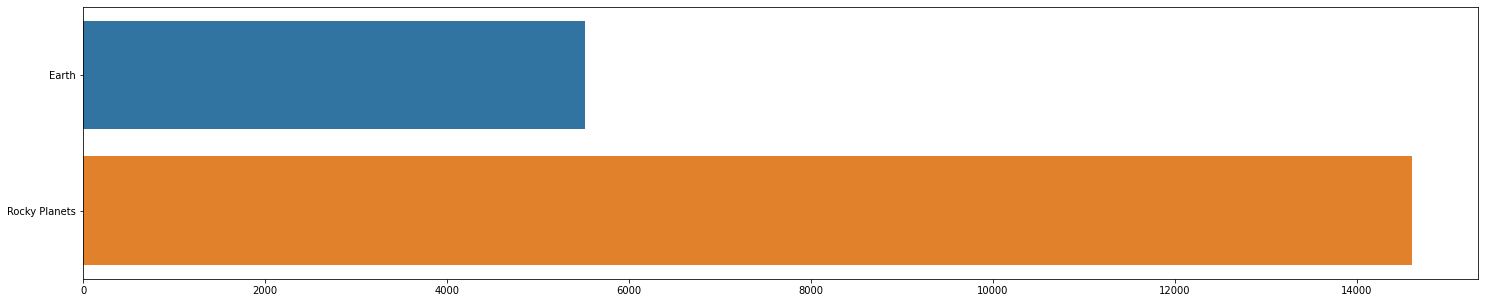

In [31]:
# Calculate
earth = df['Density (kg/m^3)'][2]
other_rocky_planets = sum(df['Density (kg/m^3)'][:4]) - earth

# Frame Values
names = ["Earth", "Rocky Planets"]
values = [earth, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title="Earth vs Other Rocky Planets Density", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth alone** makes up around **27% of the total density** of **all rocky planets**.

# **Surface Gravity EDA**

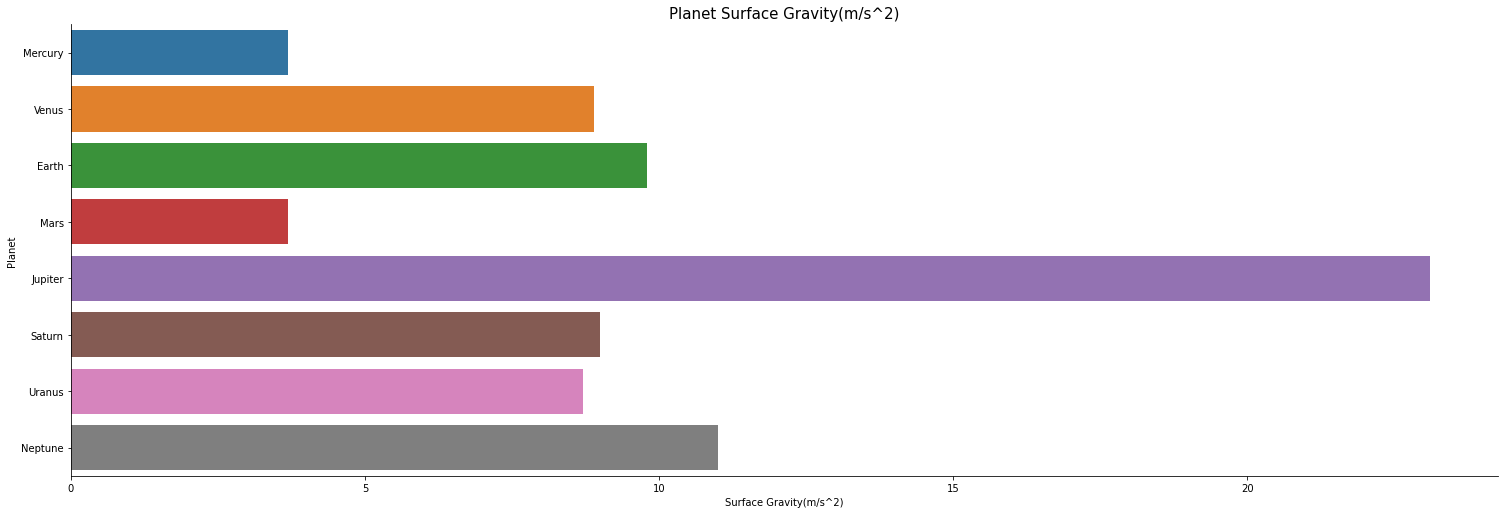

In [32]:
sns.catplot(
    data=df,
    y='Planet',
    x='Surface Gravity(m/s^2)',
    kind='bar',
    aspect=3,
    height=7
)
plt.title("Planet Surface Gravity(m/s^2)", fontsize=15)
plt.show()

Even though Jupiter is made up of gas, it's **core is still powerful** enough to have the **highest surface gravity**.

In [33]:
# Calculate Values
names = df['Planet']
values = df['Surface Gravity(m/s^2)']

# Plot
fig = px.pie(names=names, values=values, title="Planet Surface Gravity(m/s^2)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

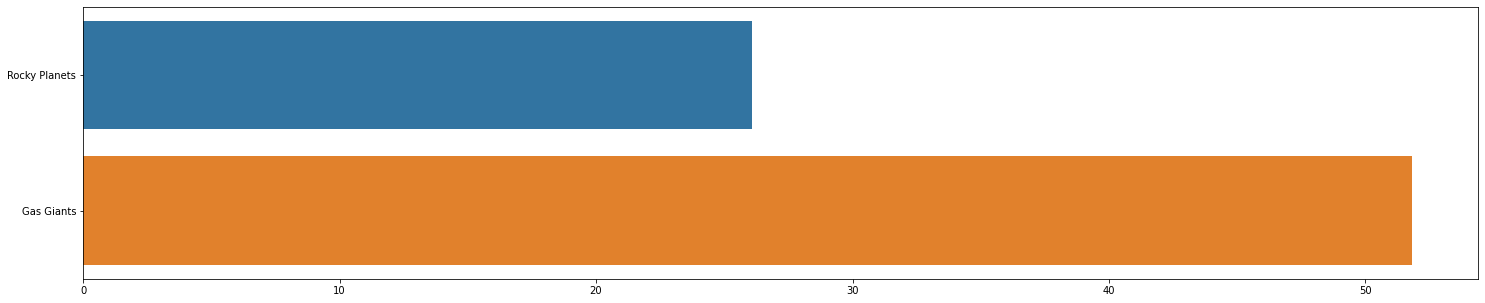

In [34]:
# Calculate
rocky_planets = sum(df['Surface Gravity(m/s^2)'][:4])
gas_planets = sum(df['Surface Gravity(m/s^2)'][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title="Rocky vs Gas Giants Surface Gravity(m/s^2)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Interestingly, **gas giants** still have **more surface gravity** than the **rocky planets**.

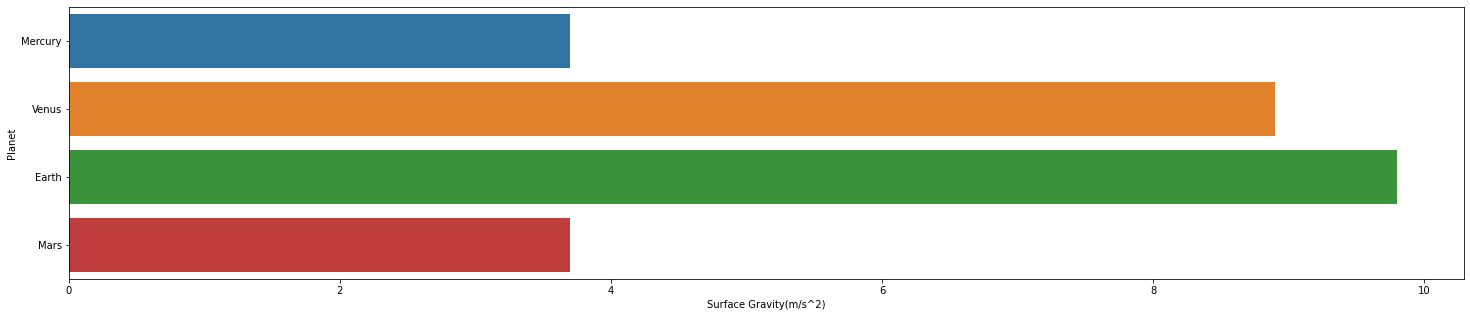

In [35]:
# Calculate Values
names = df['Planet'][df['Surface Gravity(m/s^2)'][:4].index]
values = df['Surface Gravity(m/s^2)'][:4]

# Plot
fig = px.pie(names=names, values=values, title="Rocky Planets Surface Gravity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth** has the **strongest surface gravity** among **all other rocky planets**.

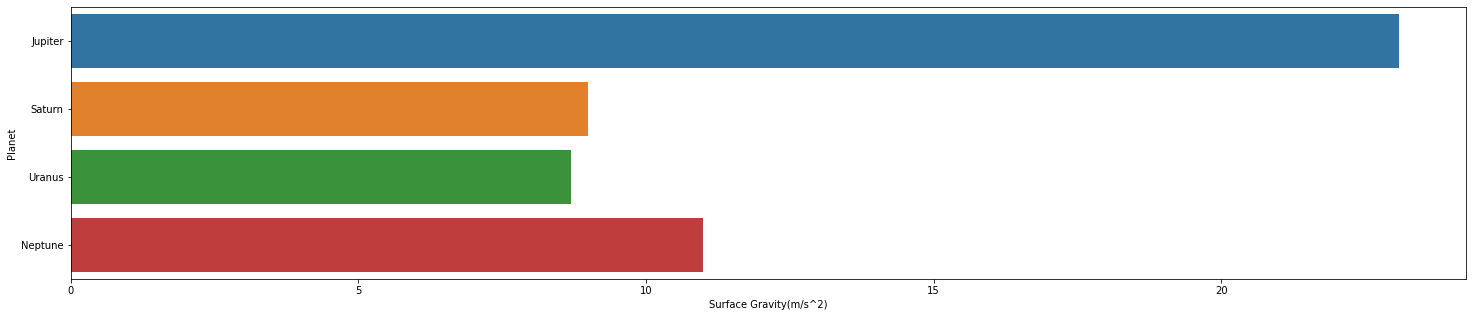

In [36]:
# Calculate Values
names = df['Planet'][df['Surface Gravity(m/s^2)'][4:].index]
values = df['Surface Gravity(m/s^2)'][4:]

# Plot
fig = px.pie(names=names, values=values, title="Gas Planets Surface Gravity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter dominates** all **gas planets** in terms of **surface gravity**.

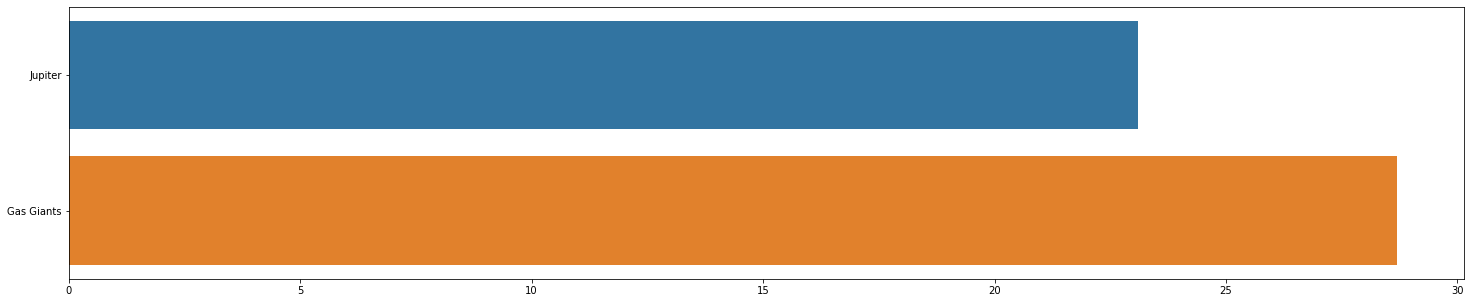

In [37]:
# Calculate
jupiter = df['Surface Gravity(m/s^2)'][4]
other_gas_planets = sum(df['Surface Gravity(m/s^2)'][4:]) - jupiter

# Frame Values
names = ["Jupiter", "Gas Giants"]
values = [jupiter, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs Gas Planets Surface Gravity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** still maintains **high dominance** in terms of **surface gravity** among all the other **Gas Giants**.

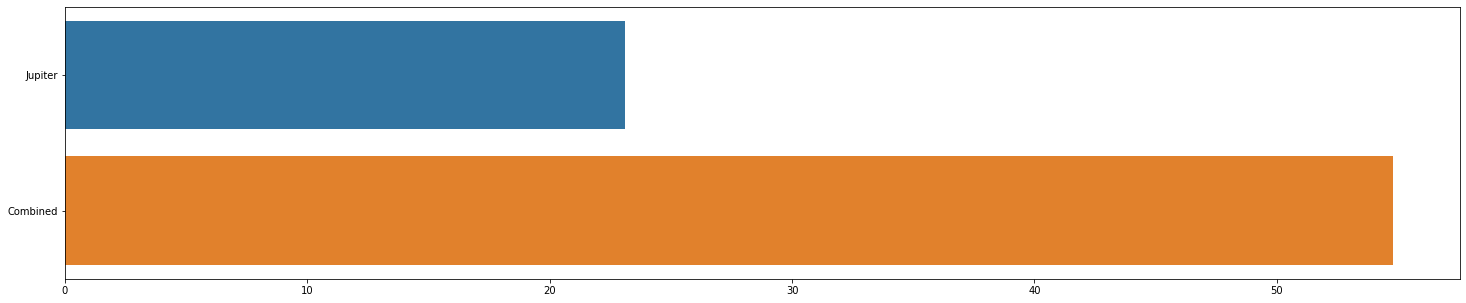

In [38]:
# Calculate Values
Jupiter = df['Surface Gravity(m/s^2)'].to_numpy()[4]
combined = sum(df['Surface Gravity(m/s^2)']) - Jupiter

# Calculate Values
names = ["Jupiter", "Combined"]
values = [Jupiter, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs All Combined Surface Gravity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** has **around 30%** of the **surface gravity among all planets.**

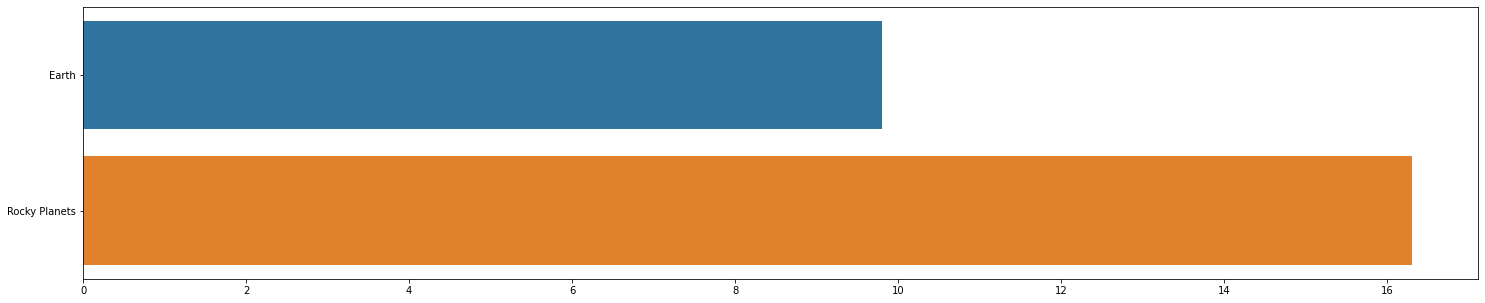

In [39]:
# Calculate
earth = df['Surface Gravity(m/s^2)'][2]
other_rocky_planets = sum(df['Surface Gravity(m/s^2)'][:4]) - earth

# Frame Values
names = ["Earth", "Rocky Planets"]
values = [earth, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title="Earth vs Other Rocky Planets Surface Gravity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Around **37%** of the **total surface gravity** of **rocky planets** is contributed by **Earth alone.**

---

# **Escape Velocity EDA**

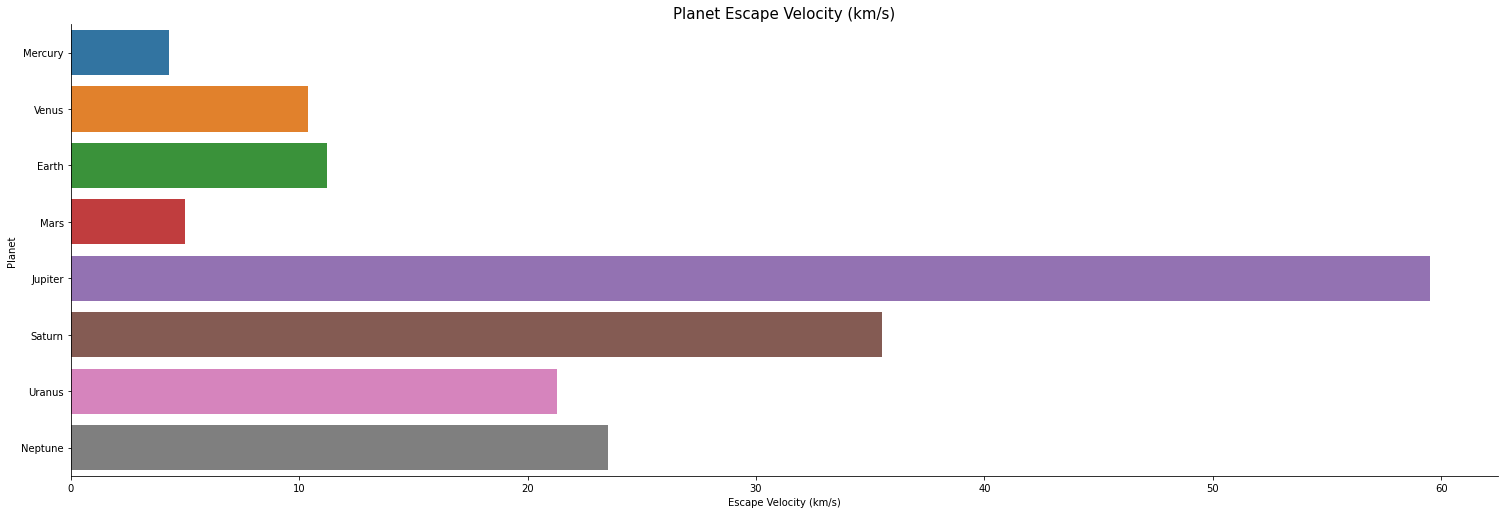

In [40]:
sns.catplot(
    data=df,
    y='Planet',
    x='Escape Velocity (km/s)',
    kind='bar',
    aspect=3,
    height=7
)
plt.title("Planet Escape Velocity (km/s)", fontsize=15)
plt.show()

In [41]:
# Calculate Values
names = df['Planet']
values = df['Escape Velocity (km/s)']

# Plot
fig = px.pie(names=names, values=values, title="Planet Escape Velocity (km/s)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

As Jupiter has the highest surface gravity it also have the highest escape velocity.

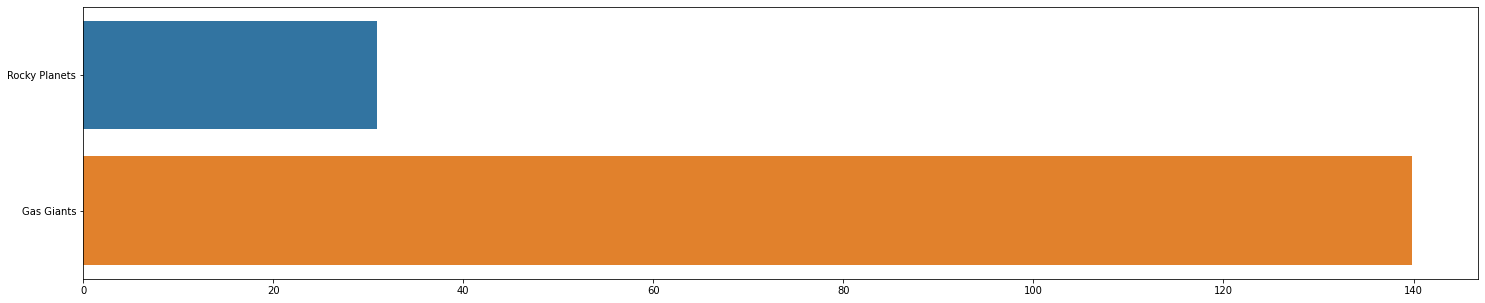

In [42]:
# Calculate
rocky_planets = sum(df['Escape Velocity (km/s)'][:4])
gas_planets = sum(df['Escape Velocity (km/s)'][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title="Rocky vs Gas Giants Escape Velocity (km/s)", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

This is because of the **high surface gravity** of **gas giants**.

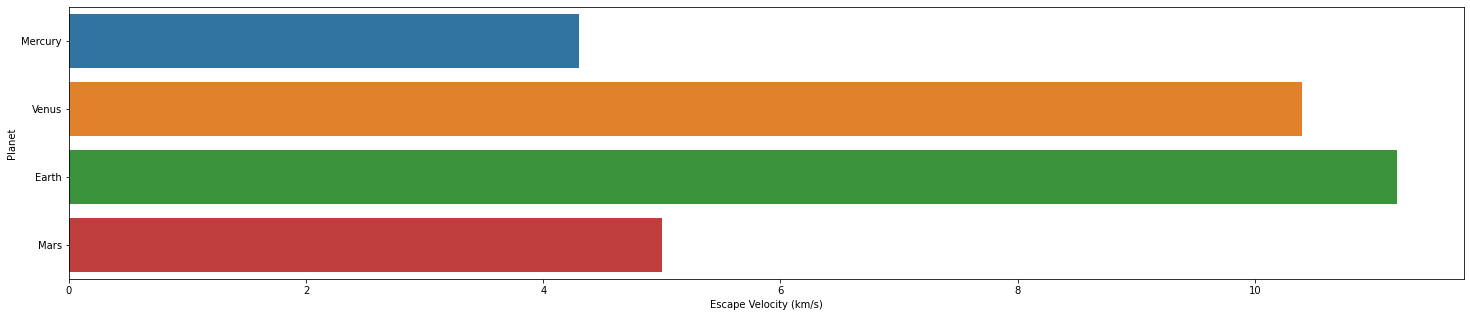

In [43]:
# Calculate Values
names = df['Planet'][df['Escape Velocity (km/s)'][:4].index]
values = df['Escape Velocity (km/s)'][:4]

# Plot
fig = px.pie(names=names, values=values, title="Rocky Planets Escape Velocity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Because the size of **Earth and Venus** is **roughly the same** there **escape velocity** is also **roughly the same**.

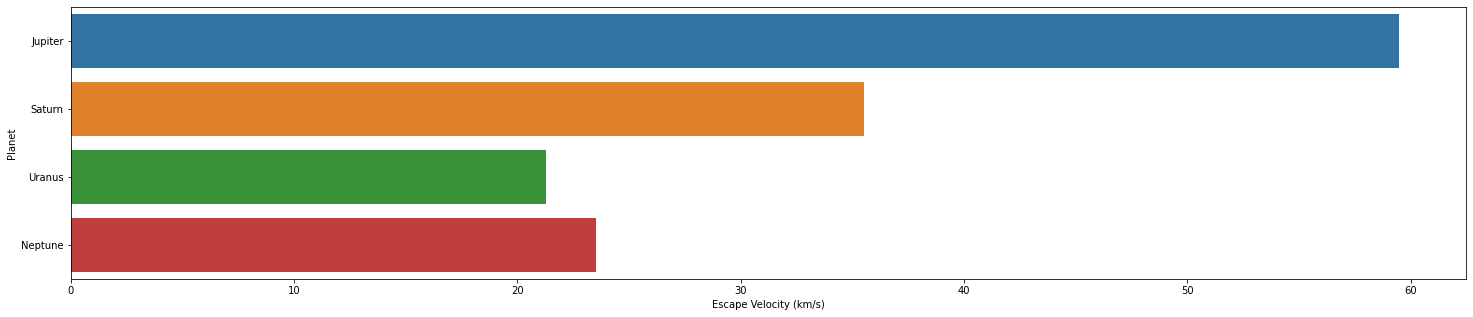

In [44]:
# Calculate Values
names = df['Planet'][df['Escape Velocity (km/s)'][4:].index]
values = df['Escape Velocity (km/s)'][4:]

# Plot
fig = px.pie(names=names, values=values, title="Gas Planets Escape Velocity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

This is because of the **bigger size** of **Jupiter** as well as the **high surface gravity**.

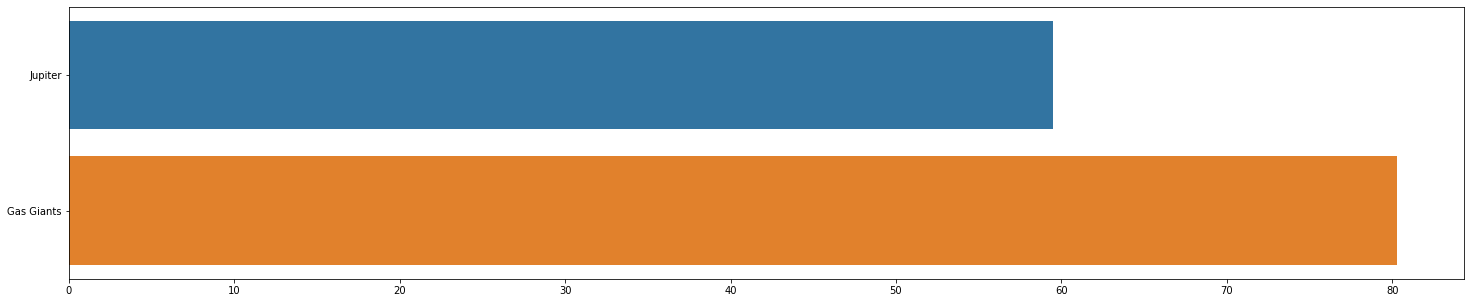

In [45]:
# Calculate
jupiter = df['Escape Velocity (km/s)'][4]
other_gas_planets = sum(df['Escape Velocity (km/s)'][4:]) - jupiter

# Frame Values
names = ["Jupiter", "Gas Giants"]
values = [jupiter, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs Gas Planets Escape Velocity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

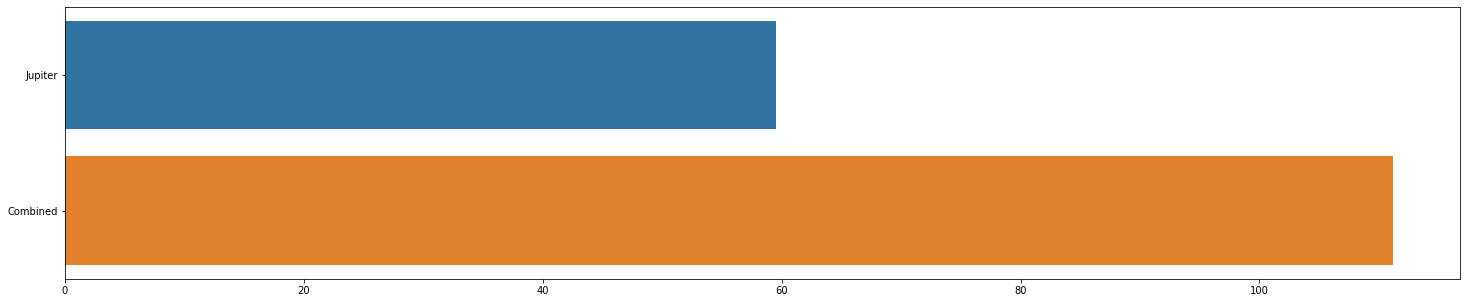

In [46]:
# Calculate Values
Jupiter = df['Escape Velocity (km/s)'].to_numpy()[4]
combined = sum(df['Escape Velocity (km/s)']) - Jupiter

# Calculate Values
names = ["Jupiter", "Combined"]
values = [Jupiter, combined]

# Pie Plot
fig = px.pie(names=names, values=values, title="Jupiter vs All Combined Escape Velocity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

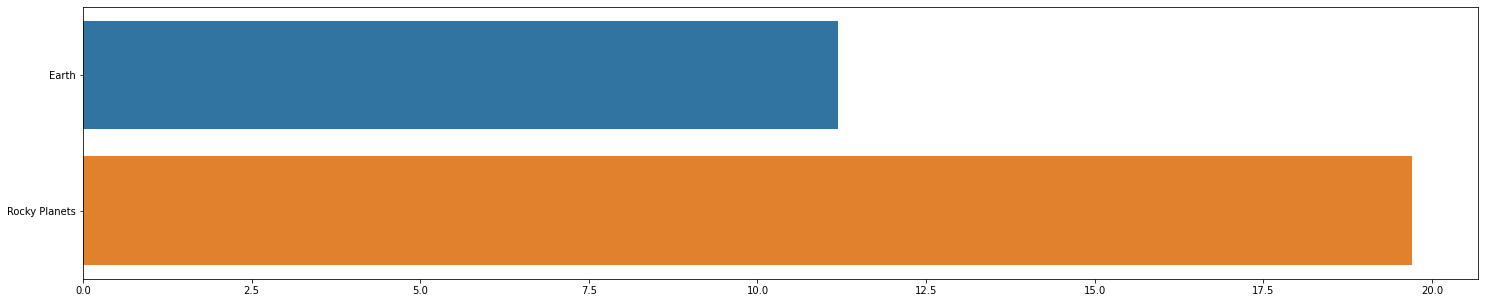

In [47]:
# Calculate
earth = df['Escape Velocity (km/s)'][2]
other_rocky_planets = sum(df['Escape Velocity (km/s)'][:4]) - earth

# Frame Values
names = ["Earth", "Rocky Planets"]
values = [earth, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title="Earth vs Other Rocky Planets Escape Velocity", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Jupiter** and **Earth** have **roughly the same dominance** over **gaseous and rocky planets**.

# **Rotation Period**

In [48]:
col = 'Rotation Period (hours)'

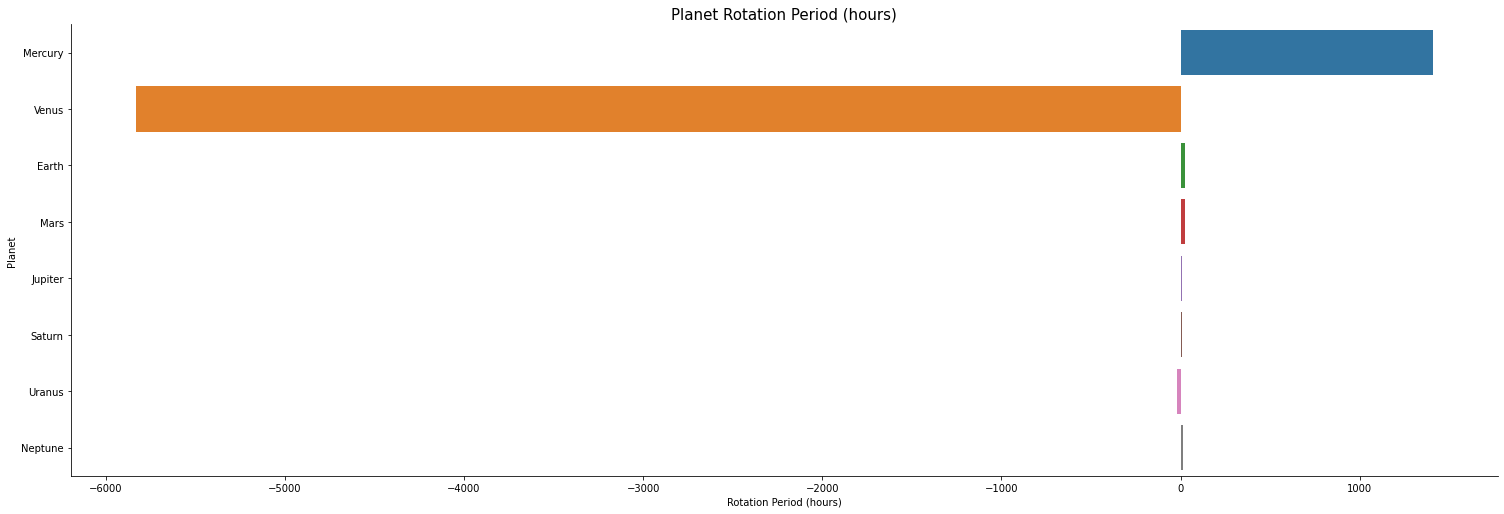

In [49]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

**Venus and Uranus** is negative not because it **rotates in the past** but because it **rotates in the opposite direction**.


---
Due to this negative value I was not able to plot some charts, thats why we will make it positive but keep in mind that it rotates in the opposite direction.

In [50]:
df[col][1] = df[col][1] * -1
df[col][6] = df[col][6] * -1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



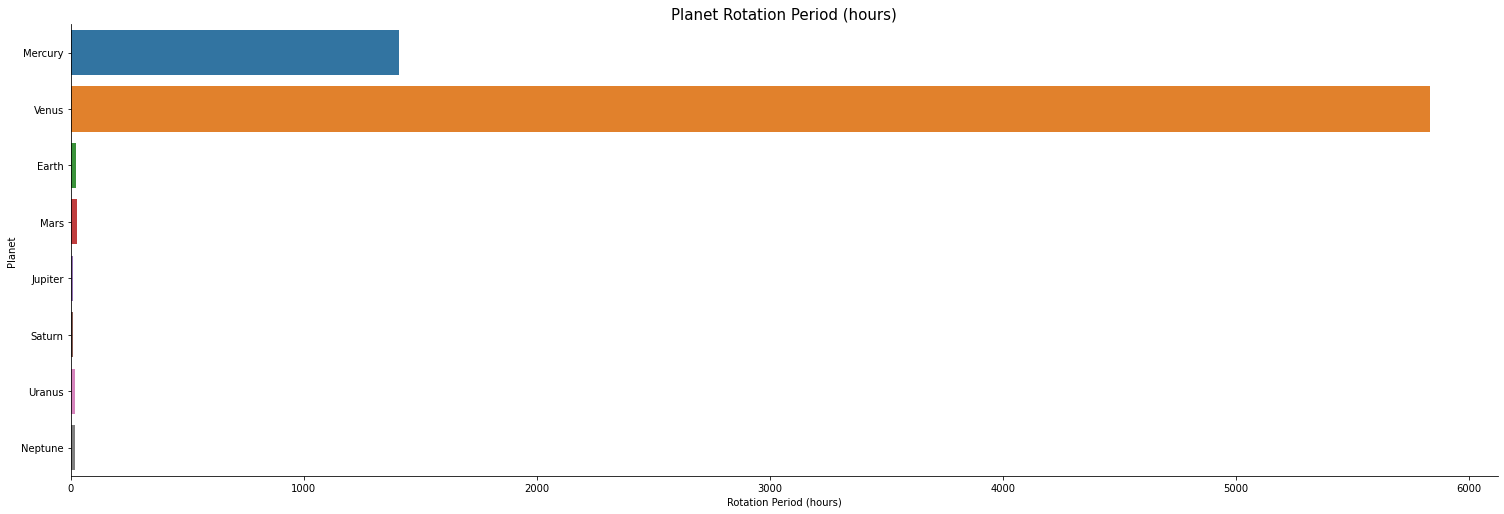

In [51]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [52]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Venus** has the **longest rotation period**.

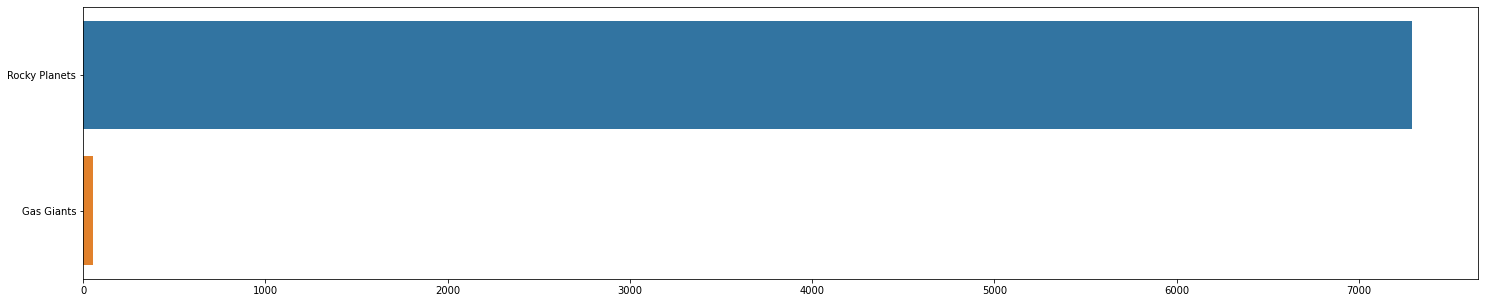

In [53]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

This means that **gas giants rotates faster**.

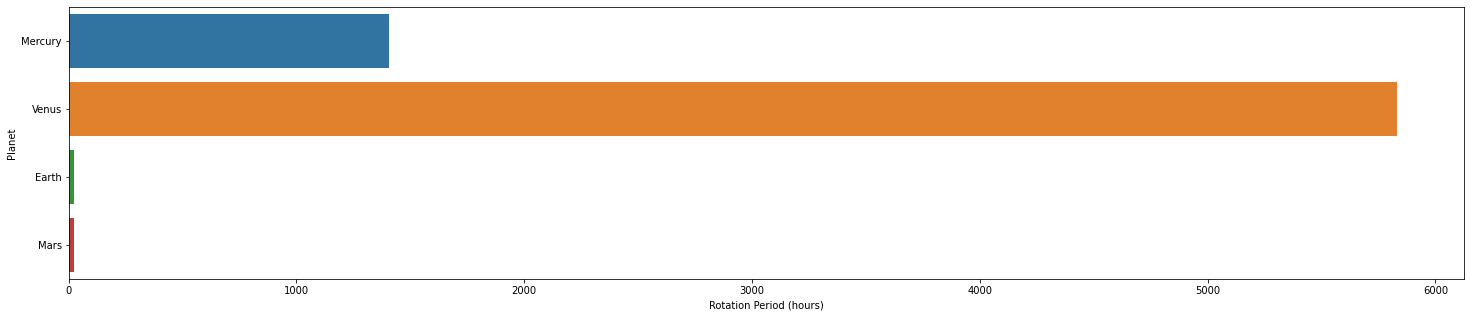

In [54]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth** and **Mars** have the **same rotation period**.

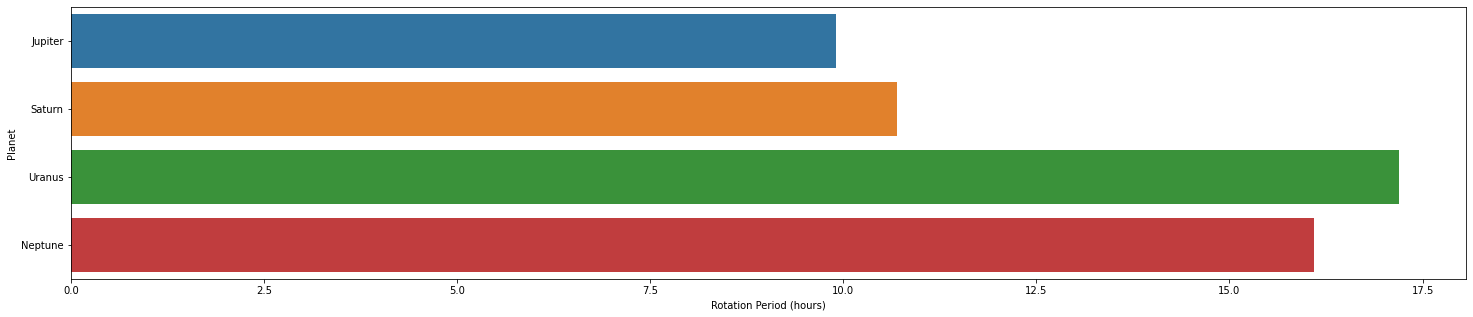

In [55]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

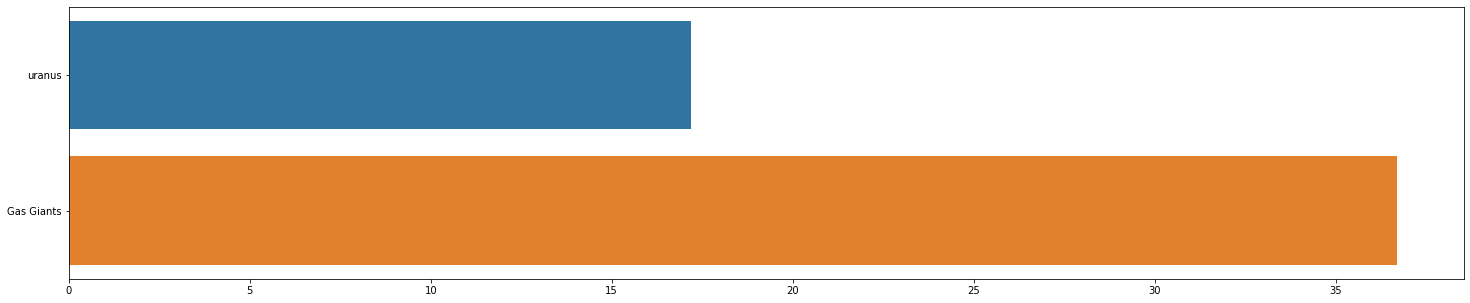

In [56]:
# Calculate
uranus = df[col][6]
other_gas_planets = sum(df[col][4:]) - uranus

# Frame Values
names = ["uranus", "Gas Giants"]
values = [uranus, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title=f"Uranus vs Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

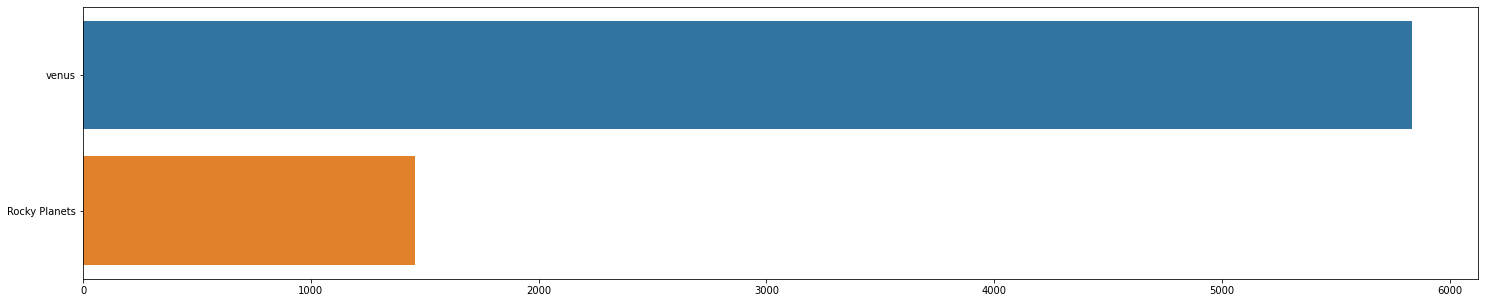

In [57]:
# Calculate
venus = df[col][1]
other_rocky_planets = sum(df[col][:4]) - venus

# Frame Values
names = ["venus", "Rocky Planets"]
values = [venus, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Venus vs Other Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Venus** makes up **80% of the total rotation period of rocky planets**.

# **Length of the Day**

In [58]:
col = 'Length of Day (hours)'

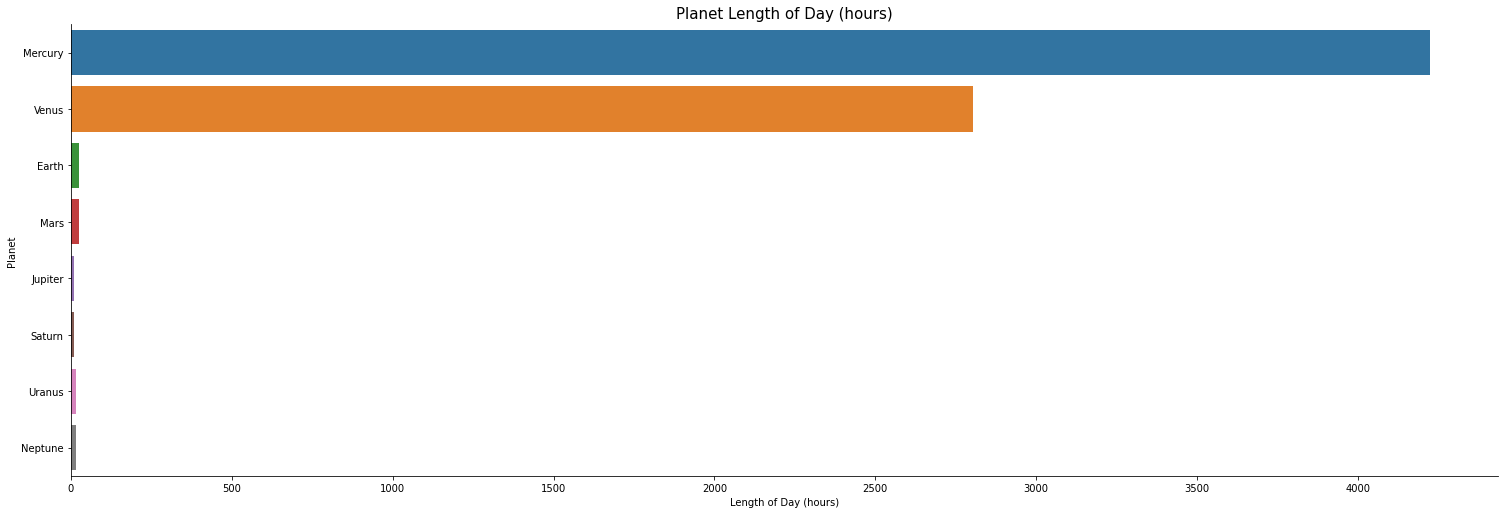

In [59]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [60]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Mercury and Venus have the longest day.**

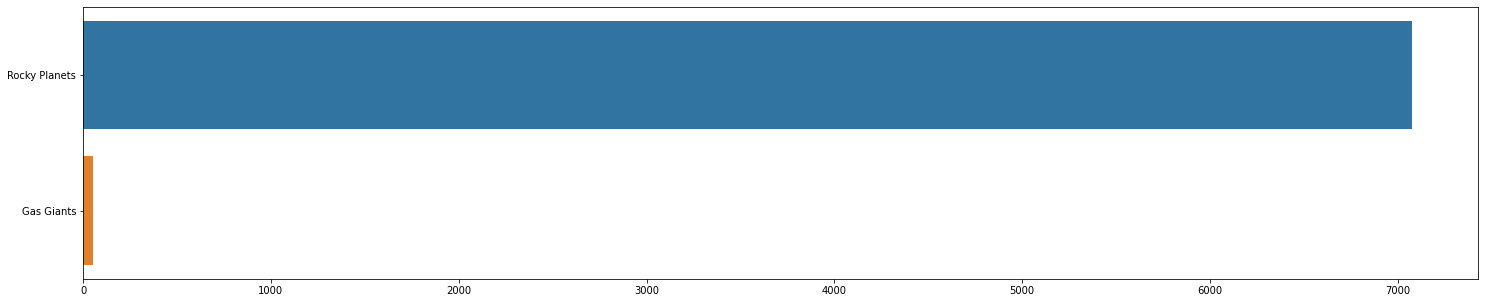

In [61]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Rocky planets have **bigger days**, this is because **rocky planets** have **slow rotation period**.

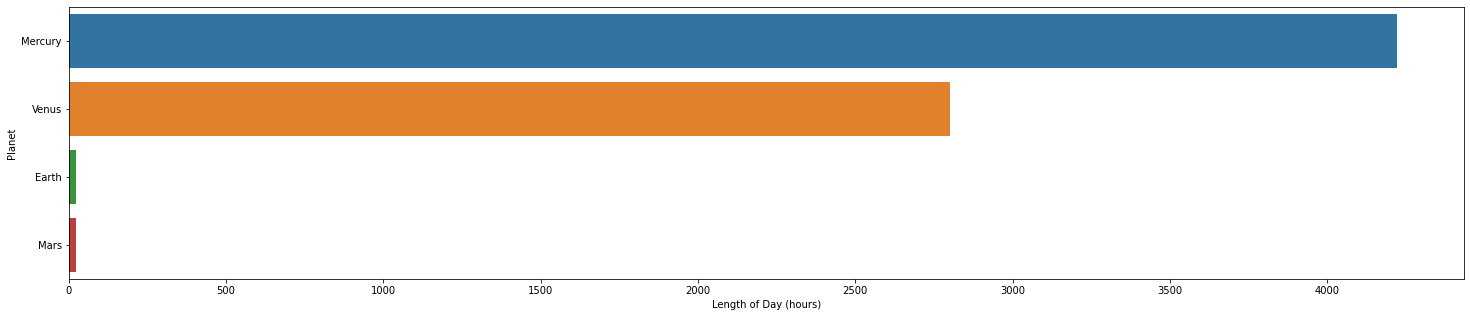

In [62]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Earth** and **Mars** have the **hours per day**.

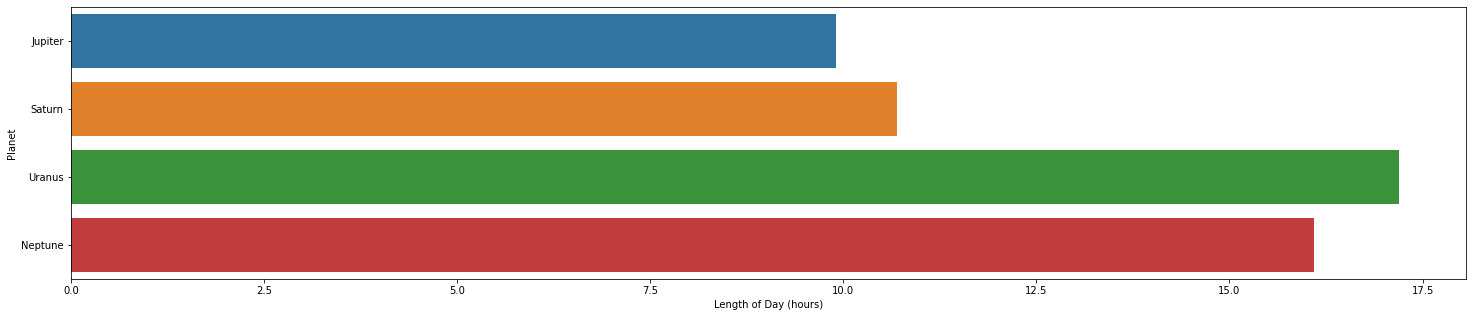

In [63]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Among the **Gas Gaints**, **Uranus** have the have the **longest day**.

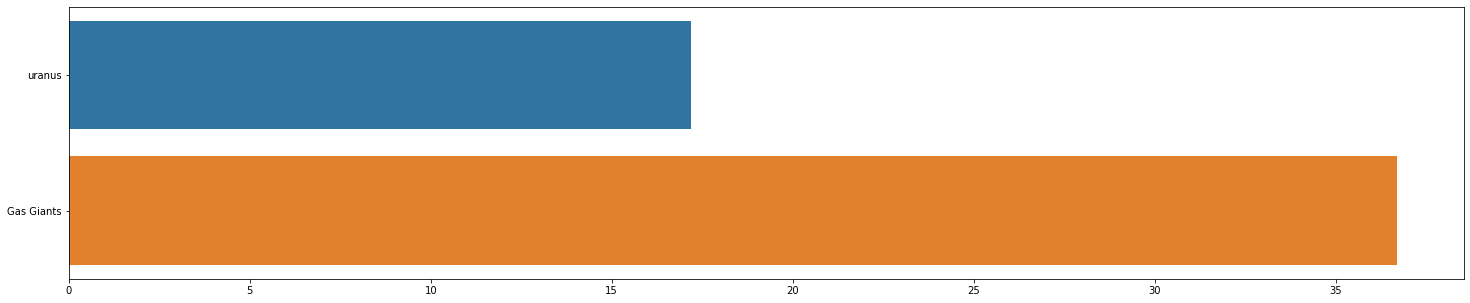

In [64]:
# Calculate
uranus = df[col][6]
other_gas_planets = sum(df[col][4:]) - uranus

# Frame Values
names = ["uranus", "Gas Giants"]
values = [uranus, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title=f"Uranus vs Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

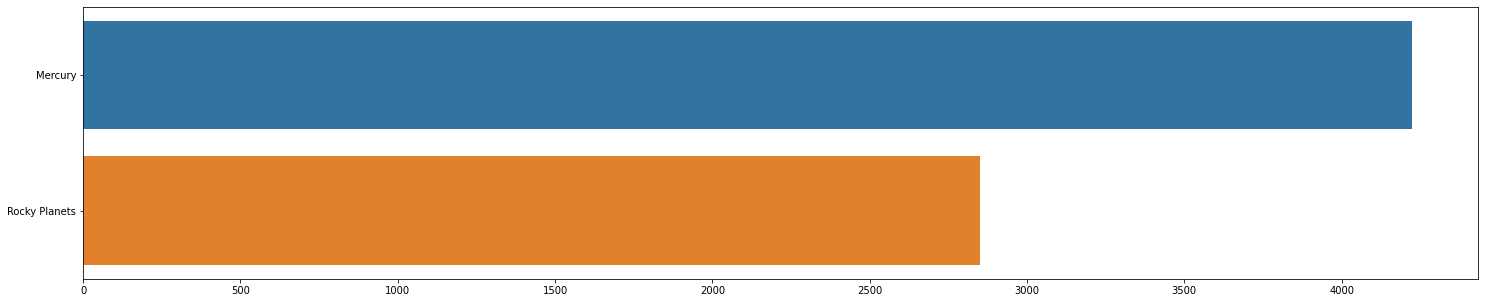

In [65]:
# Calculate
Mercury = df[col][0]
other_rocky_planets = sum(df[col][:4]) - Mercury

# Frame Values
names = ["Mercury", "Rocky Planets"]
values = [Mercury, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Mercury vs Other Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

# **Distance from Sun**

I don't think so I need to give any explanation for this.

In [66]:
col = 'Distance from Sun (10^6 km)'

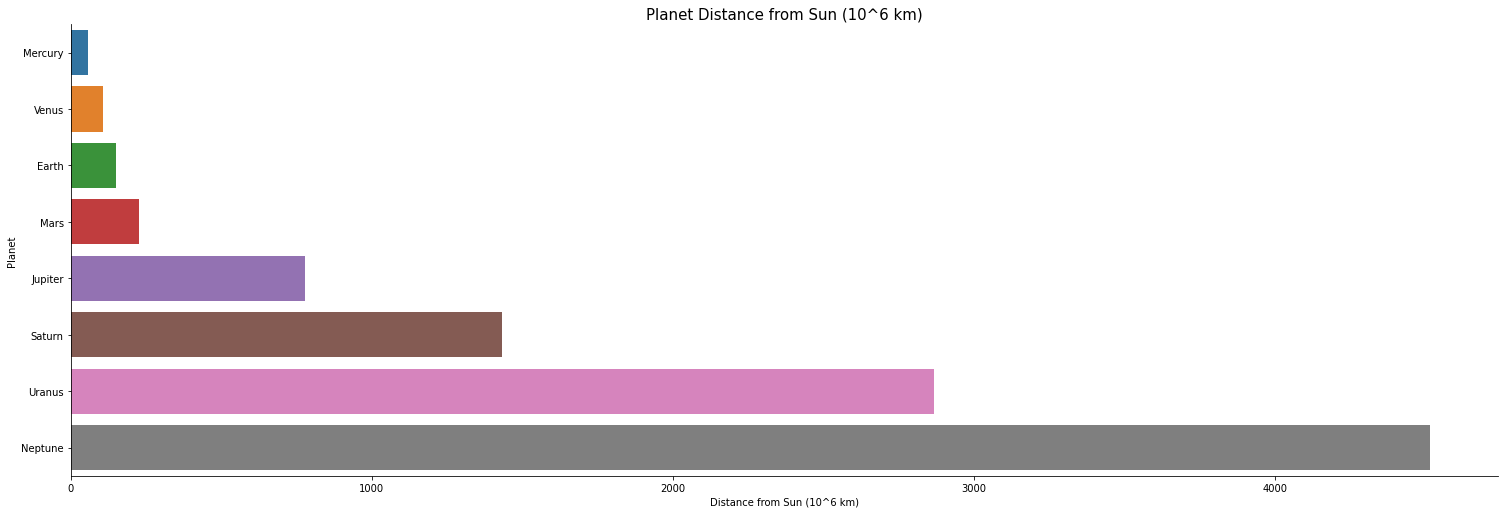

In [67]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [68]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

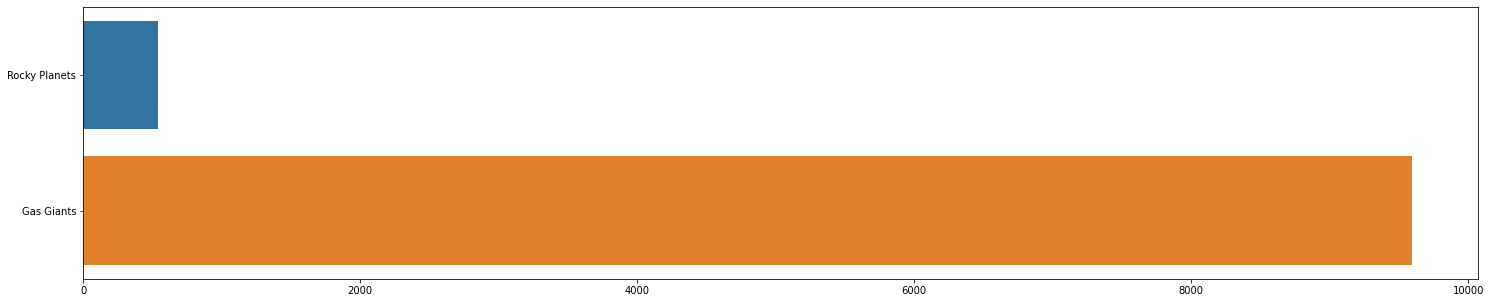

In [69]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

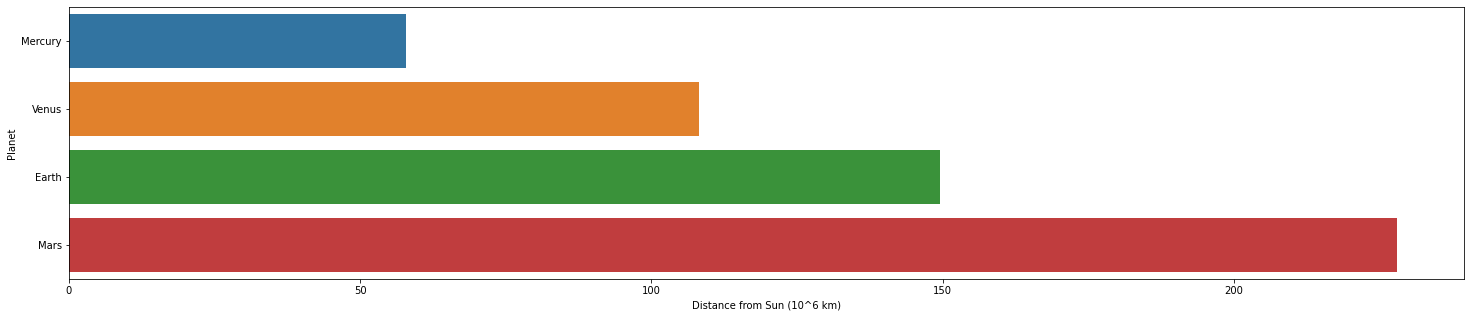

In [70]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

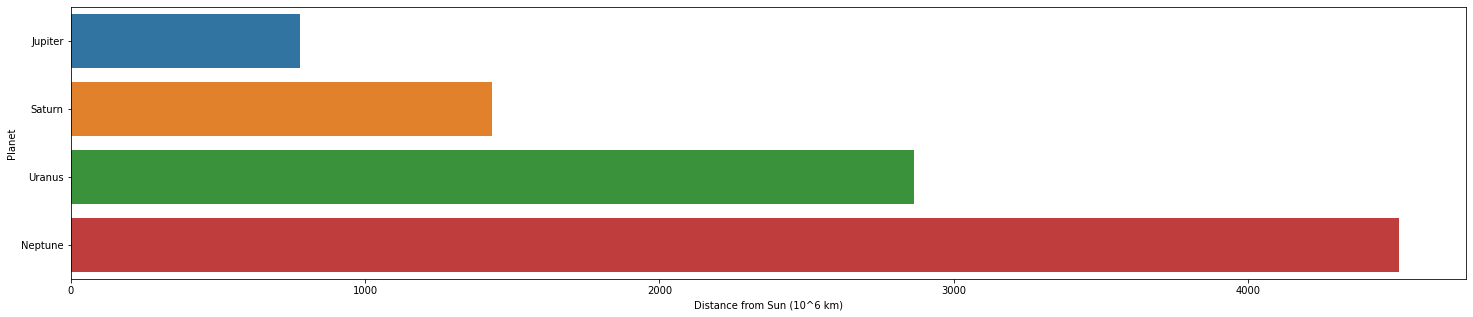

In [71]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

# **Perihelion (10^6 km)**

This is straight forward and there is nothing new to tell.

In [72]:
col = "Perihelion (10^6 km)"

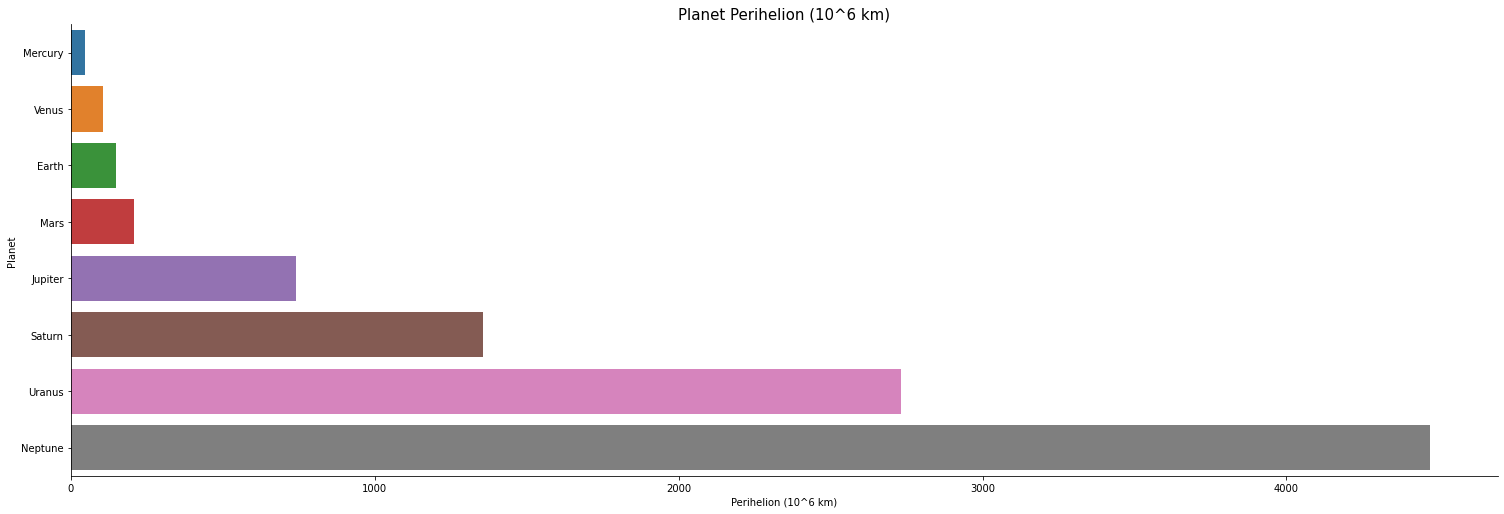

In [73]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [74]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Aphelion (10^6 km)**

This is straight forward and there is nothing new to tell.

In [75]:
col = "Aphelion (10^6 km)"

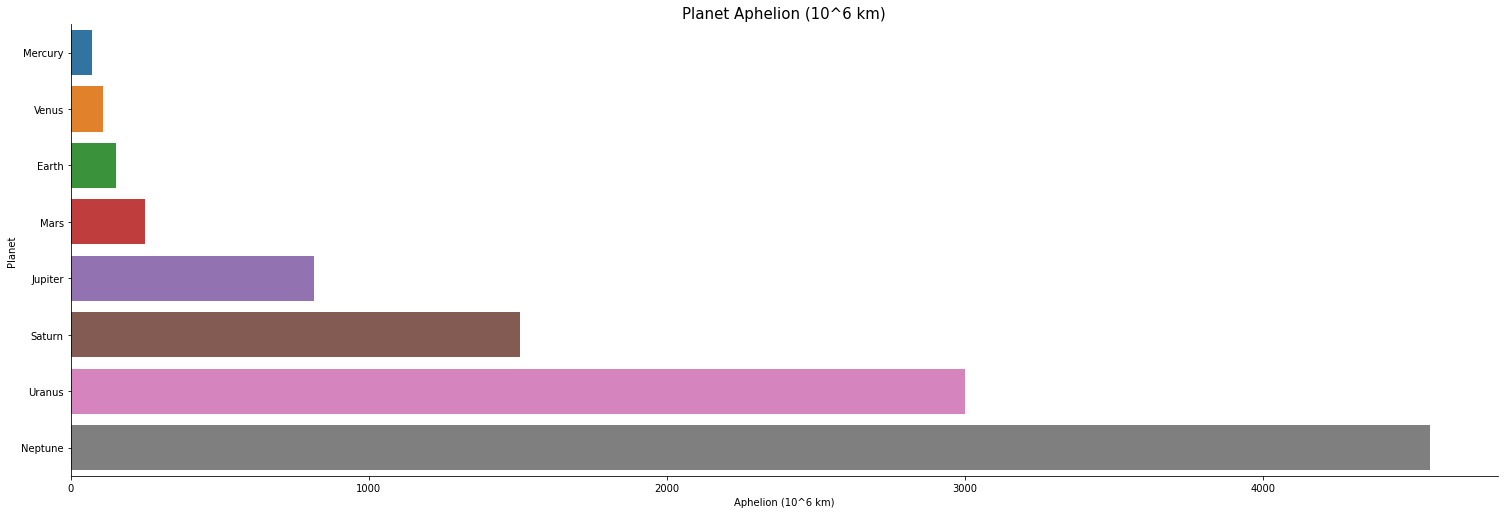

In [76]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [77]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Orbital Period**

Nothing special to be said, its all about the **distance between sun and the planet**.

In [78]:
col = 'Orbital Period (days)'

In [79]:
df[col] = df[col].map(lambda x: float(x.replace(",",'')))

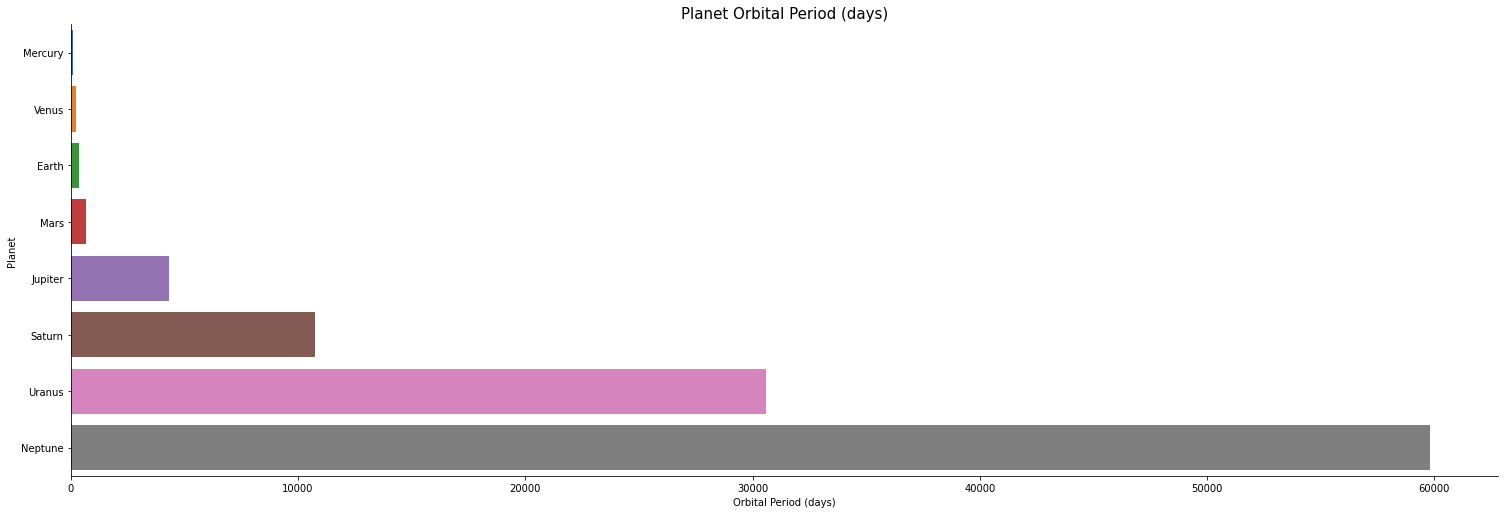

In [80]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [81]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Orbital Velocity**

In [82]:
col = 'Orbital Velocity (km/s)'

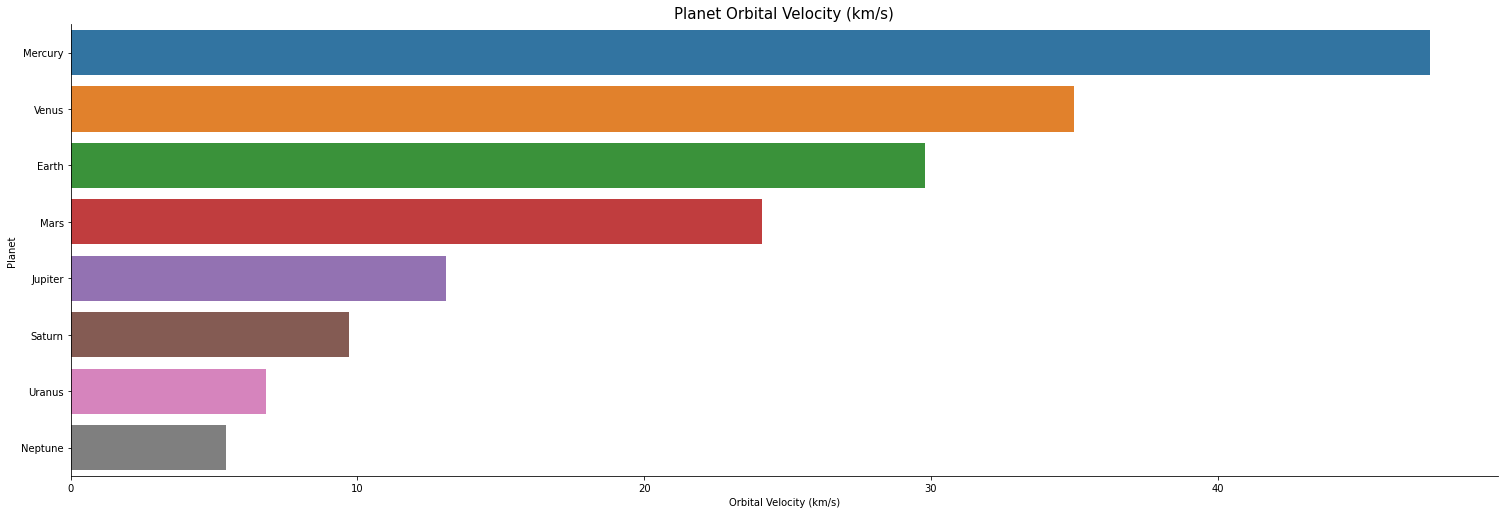

In [83]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [84]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# **Orbital Inclination**

In [85]:
col = 'Orbital Inclination (degrees)'

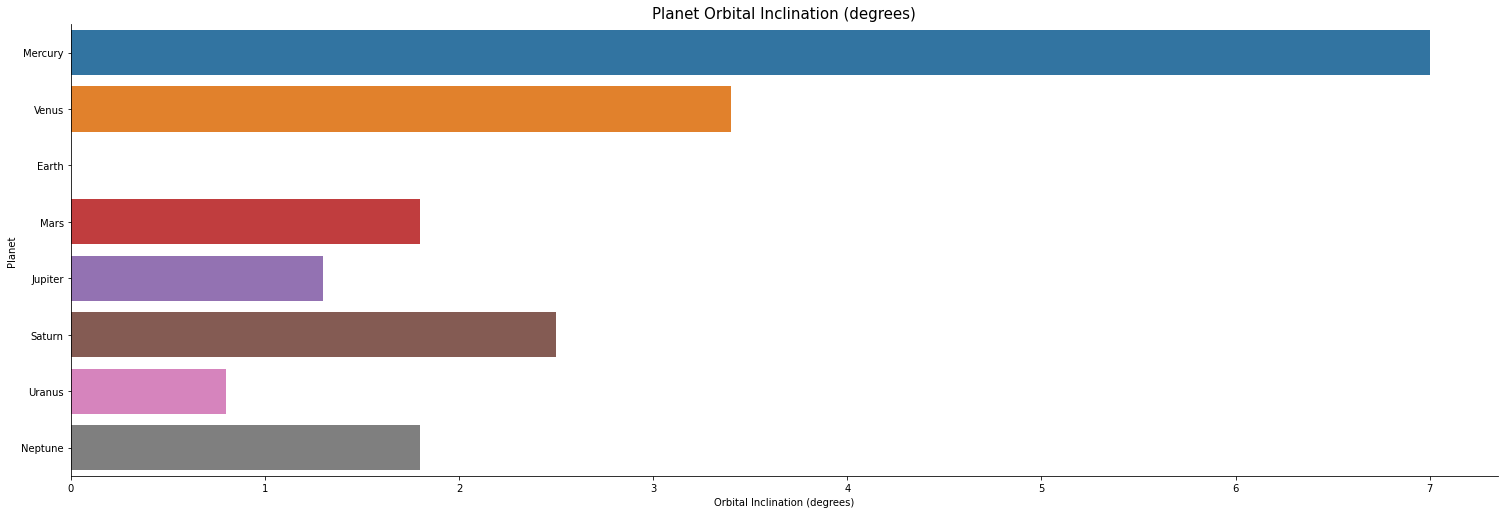

In [86]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

**Mercury** has the **highest Orbital Inclination**.

**Mercury and Venus have the longest day.**

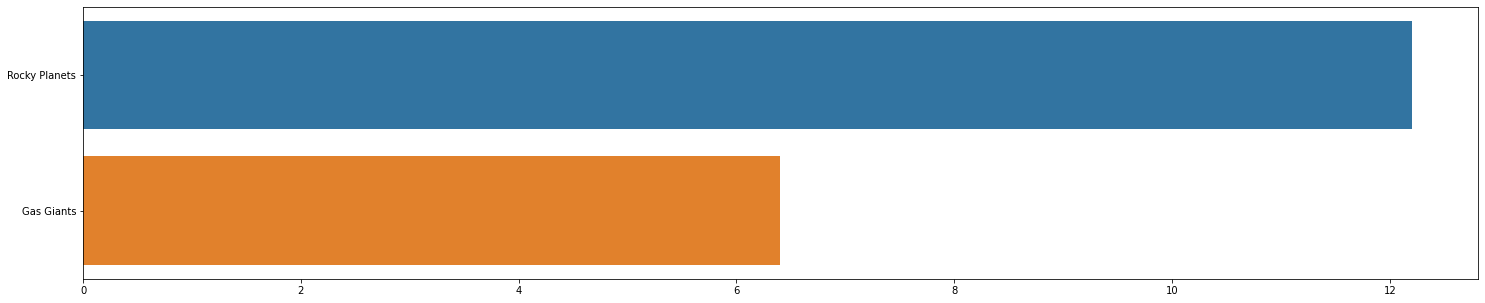

In [87]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Rocky planets** have more **orbital inclination** than the **gaseous giants.**

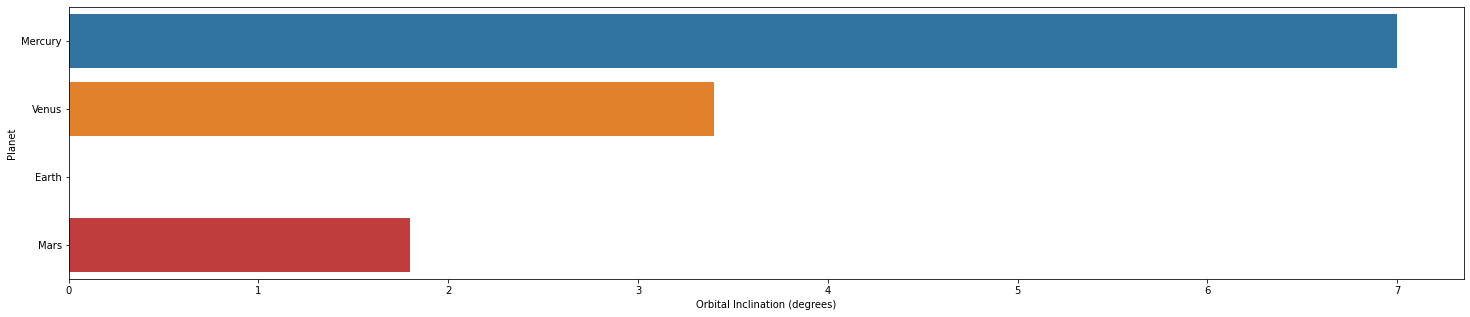

In [88]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Mercury has the highest orbital inclination among all rocky planets.**

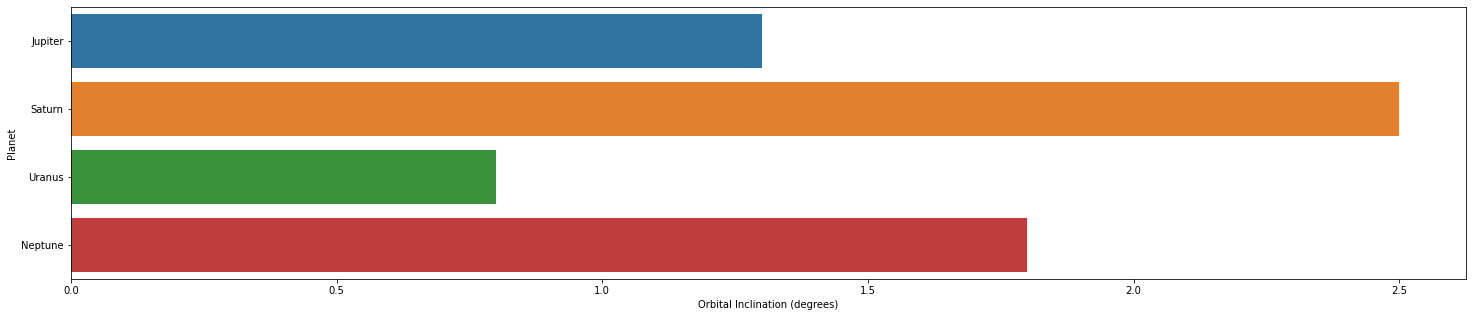

In [89]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Saturn has the highest orbital inclination among all gaseous planets.**

---

# **Orbital Eccentricity**

In [90]:
col = 'Orbital Eccentricity'

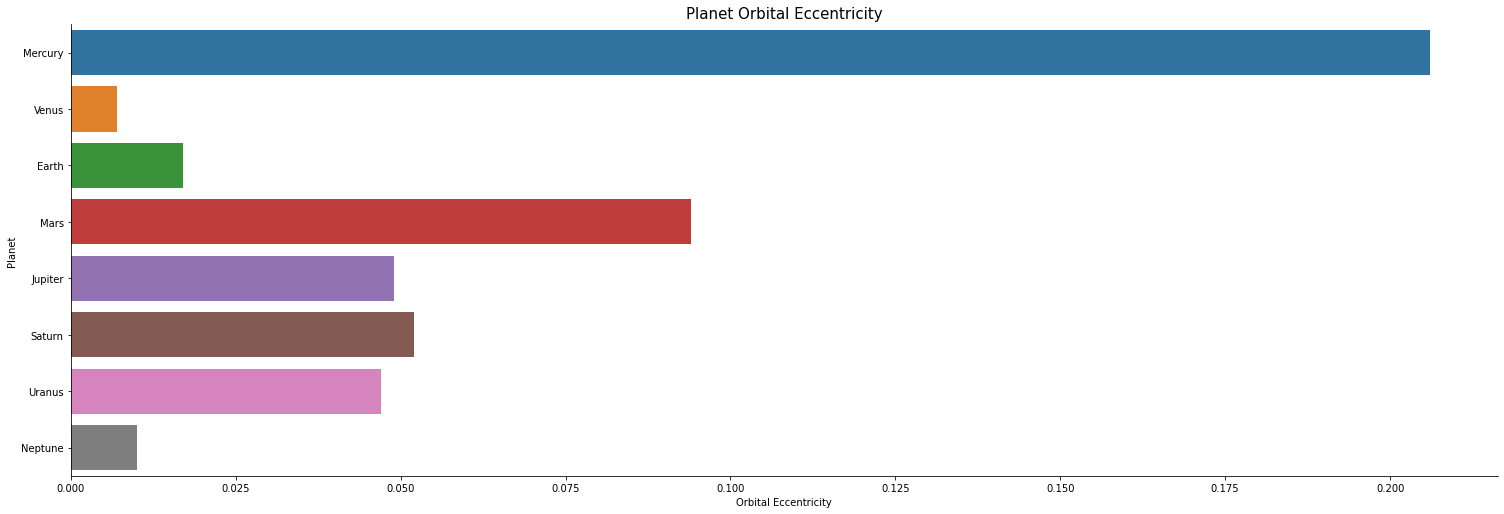

In [91]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [92]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Mercury** have the **highest orbital eccentricity**, followed by **Mars**.

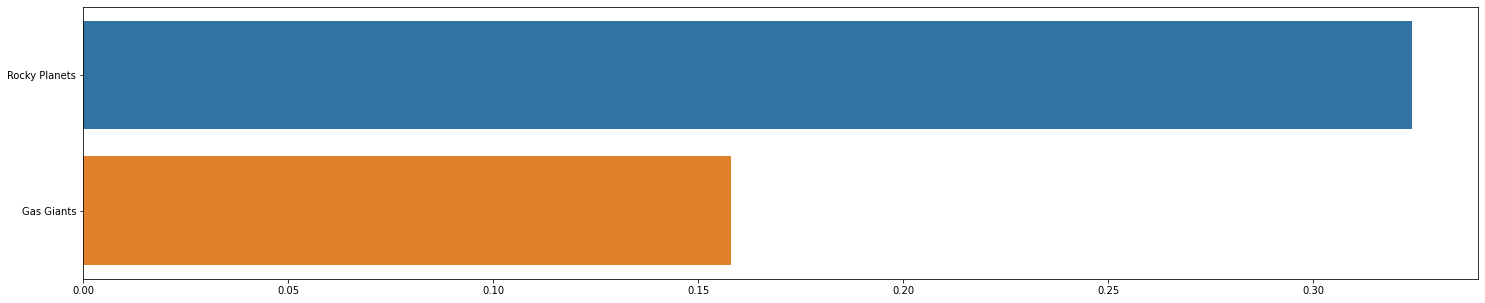

In [93]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

The **total orbital eccentricity** of **rocky planets** is more than the **Gas Giants**.

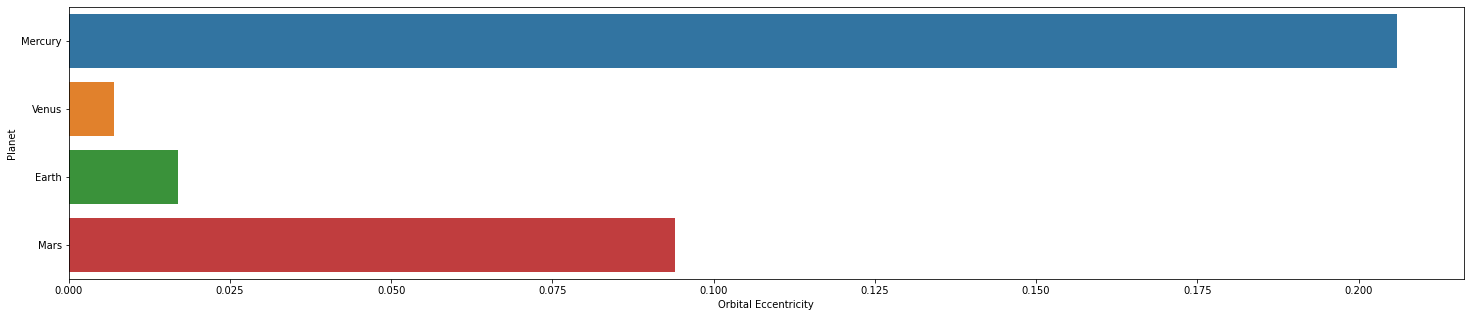

In [94]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

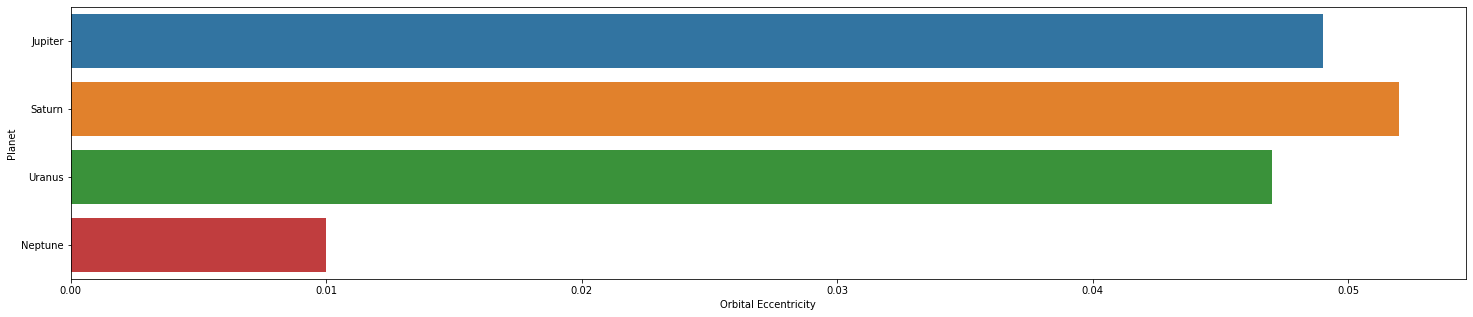

In [95]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Among the **gaseous giants**, **Saturn** have the **highest orbital eccentricity** followed by **Jupiter** and **Uranus**.

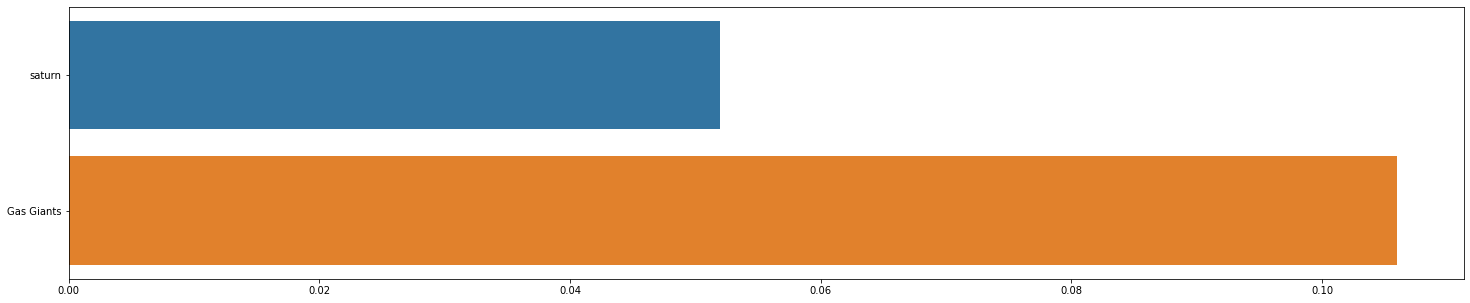

In [96]:
# Calculate
saturn = df[col][5]
other_gas_planets = sum(df[col][4:]) - saturn

# Frame Values
names = ["saturn", "Gas Giants"]
values = [saturn, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title=f"Saturn vs Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Saturn** alone accounts for **around 30% of the total orbital eccentricity** of all **gaseous planets**.

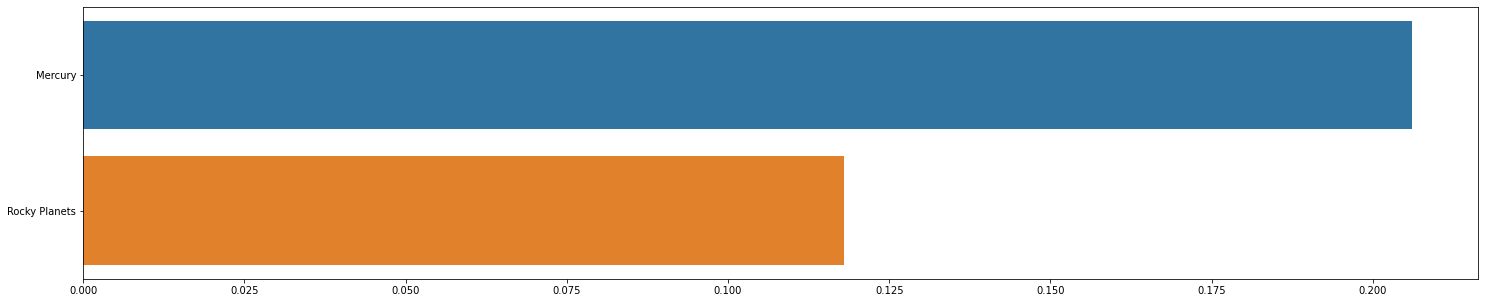

In [97]:
# Calculate
Mercury = df[col][0]
other_rocky_planets = sum(df[col][:4]) - Mercury

# Frame Values
names = ["Mercury", "Rocky Planets"]
values = [Mercury, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Mercury vs Other Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

The **orbital eccentricity** of **Mercury** is **greater than the combined orbital eccentricity** of all other **rocky planets**.

---

# **Obliquity to Orbit**

In [98]:
col = 'Obliquity to Orbit (degrees)'

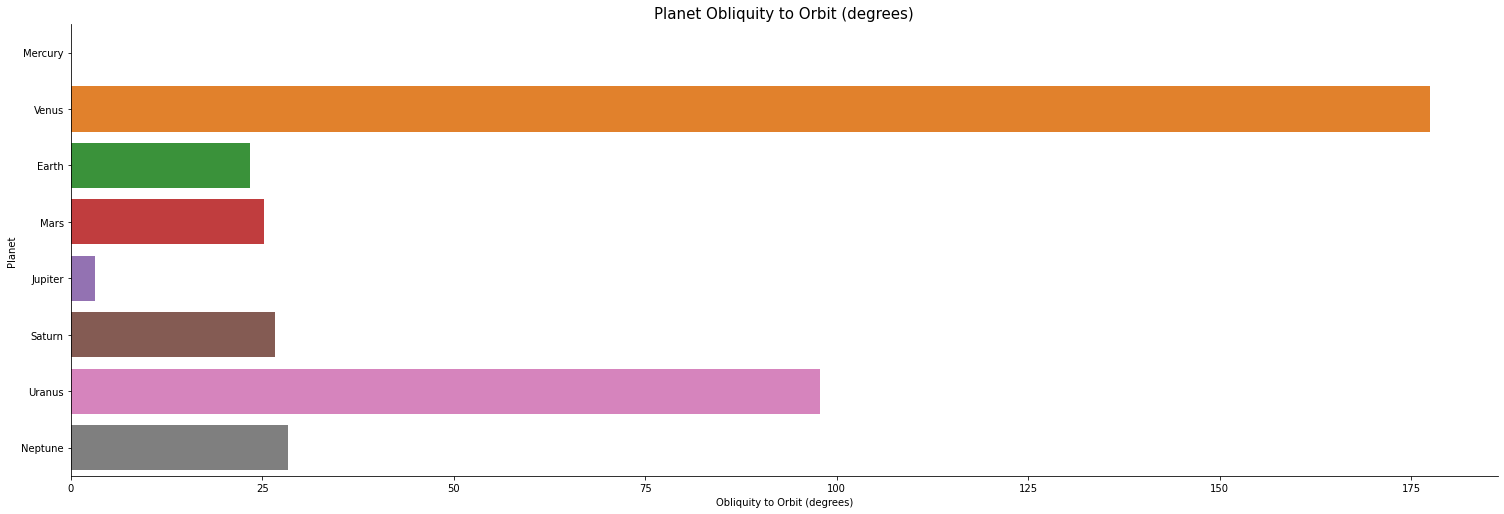

In [99]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [100]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Venus** among the **rocky planets** and **Uranus** among the **gaseous giants** have the **highest values**.

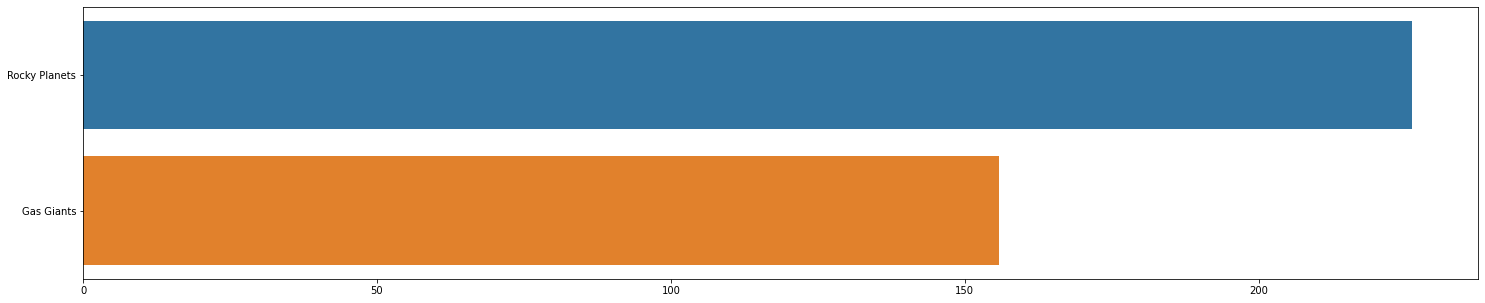

In [101]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Rocky planets** have more **obliquity to orbit** than the **gaseous giants**.

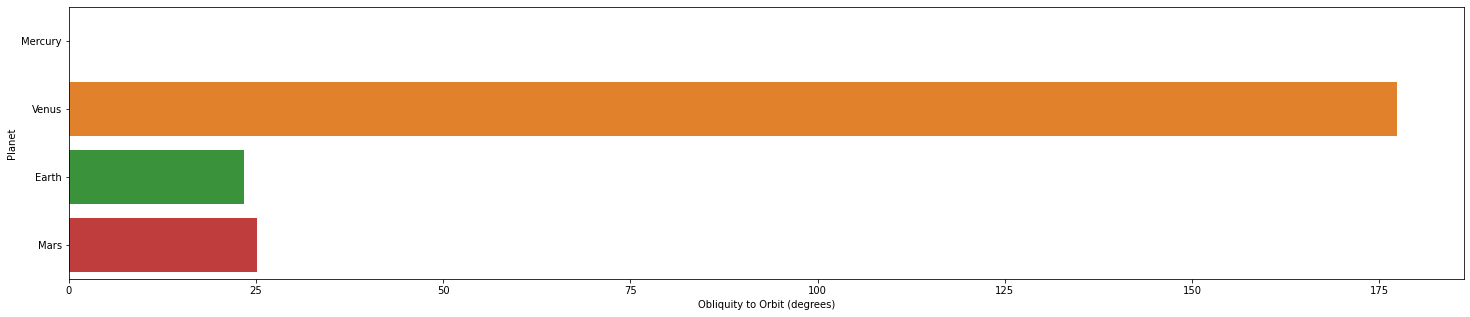

In [102]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Venus** have a **clear dominance** over all **rocky planets** in terms of **obliquity to orbit**.

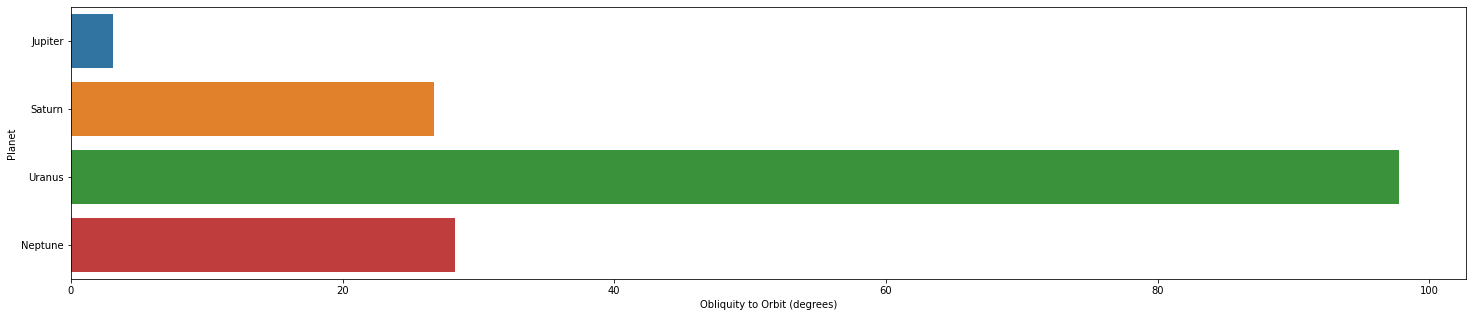

In [103]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Here, **Uranus have clear dominance**.

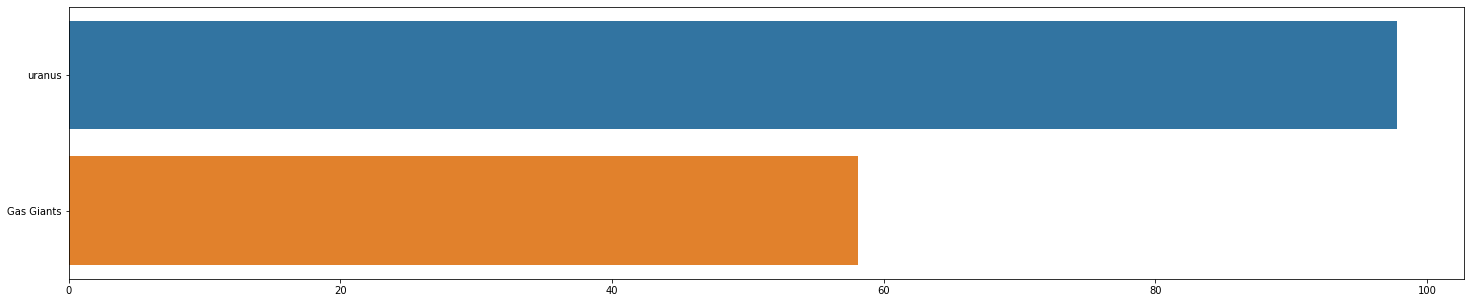

In [104]:
# Calculate
uranus = df[col][6]
other_gas_planets = sum(df[col][4:]) - uranus

# Frame Values
names = ["uranus", "Gas Giants"]
values = [uranus, other_gas_planets]


# Pie Plot
fig = px.pie(names=names, values=values, title=f"uranus vs Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

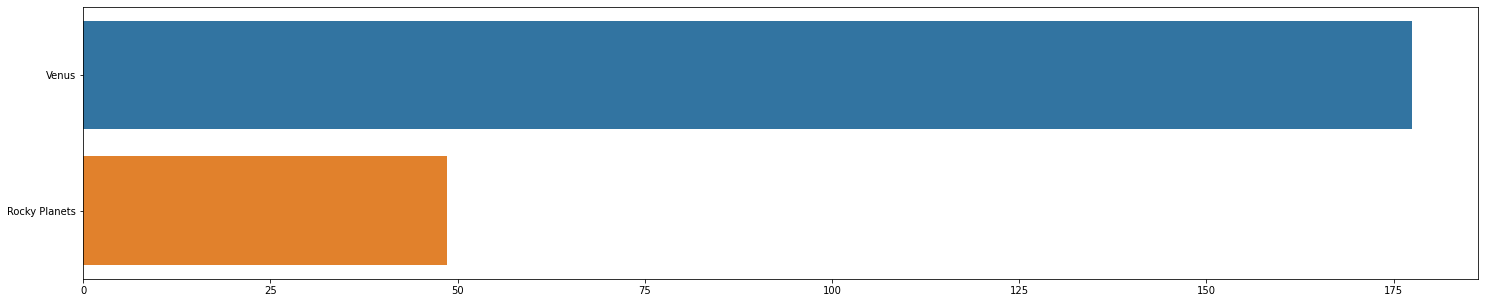

In [105]:
# Calculate
Venus = df[col][1]
other_rocky_planets = sum(df[col][:4]) - Venus

# Frame Values
names = ["Venus", "Rocky Planets"]
values = [Venus, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Venus vs Other Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

---

# **Mean Temperature**

In [106]:
col = 'Mean Temperature (C)'

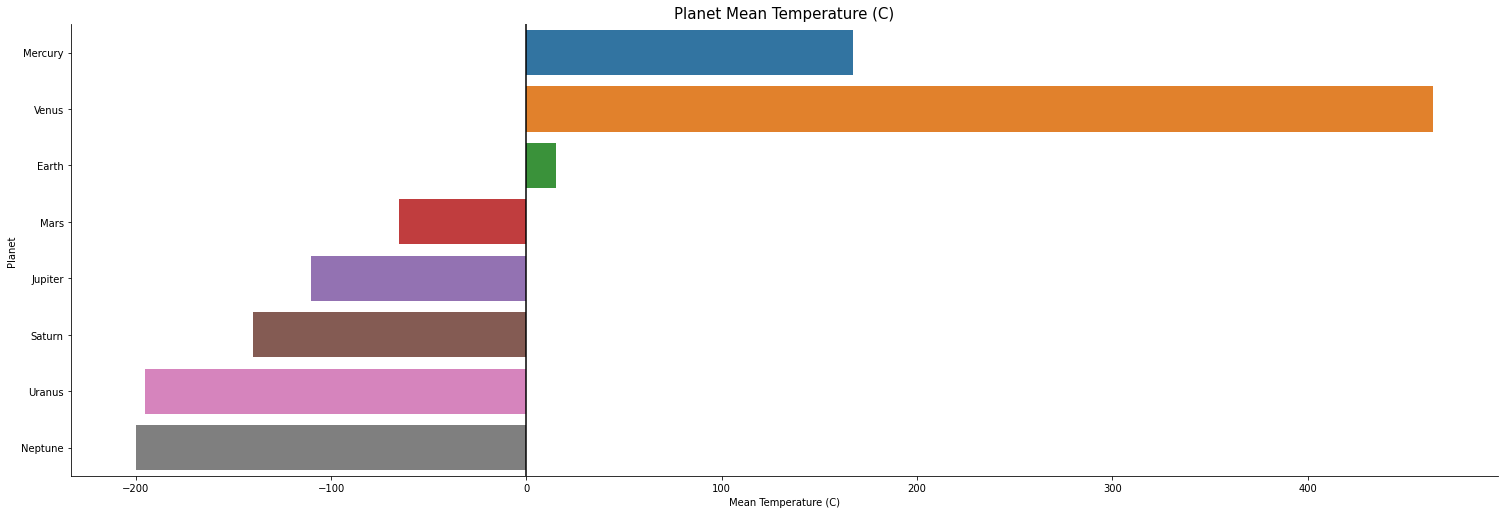

In [107]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.axvline(0, color='k')
plt.title(f"Planet {col}", fontsize=15)
plt.show()

All the **Gas giants** are **cold** whereas most of the **rocky planets are hot**.

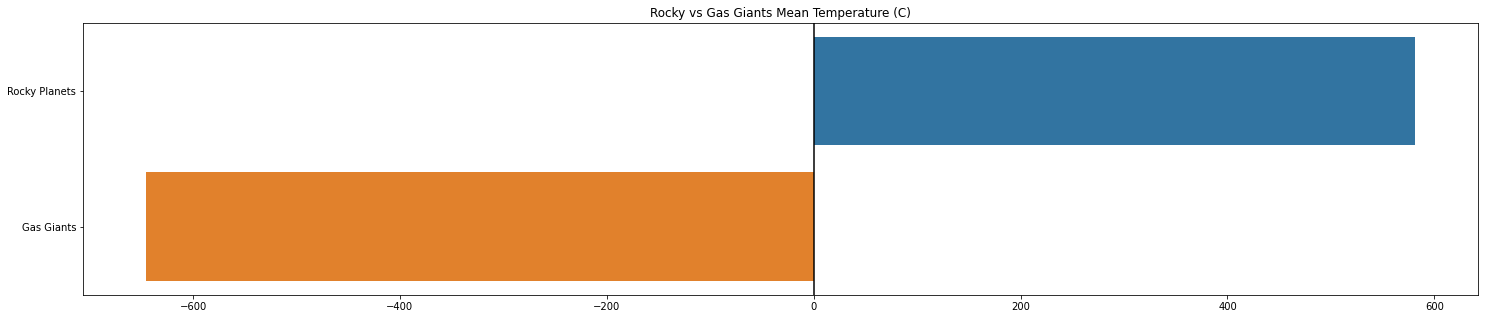

In [108]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Bar Plot
plt.figure(figsize=(25,5))
plt.title(f"Rocky vs Gas Giants {col}")
sns.barplot(y=names,x=values)
plt.axvline(0, color='k')
plt.show()

All the **rocky planets are hot** whereas the **gas giants are cold**.

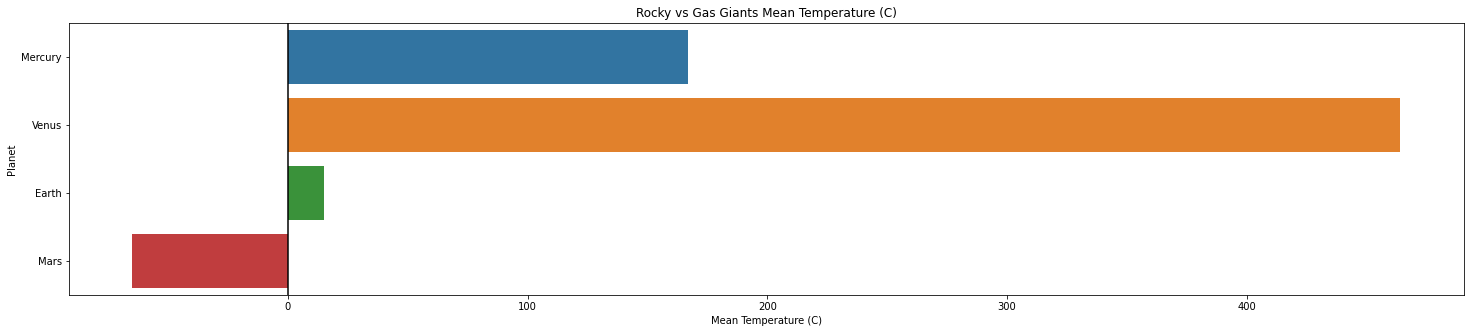

In [109]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Bar Plot
plt.figure(figsize=(25,5))
plt.title(f"Rocky vs Gas Giants {col}")
sns.barplot(y=names,x=values)
plt.axvline(0, color='k')
plt.show()

Among the **rocky planets** only **Mars** has **negative temperature** whereas **Venus** is the **hottest planet**.

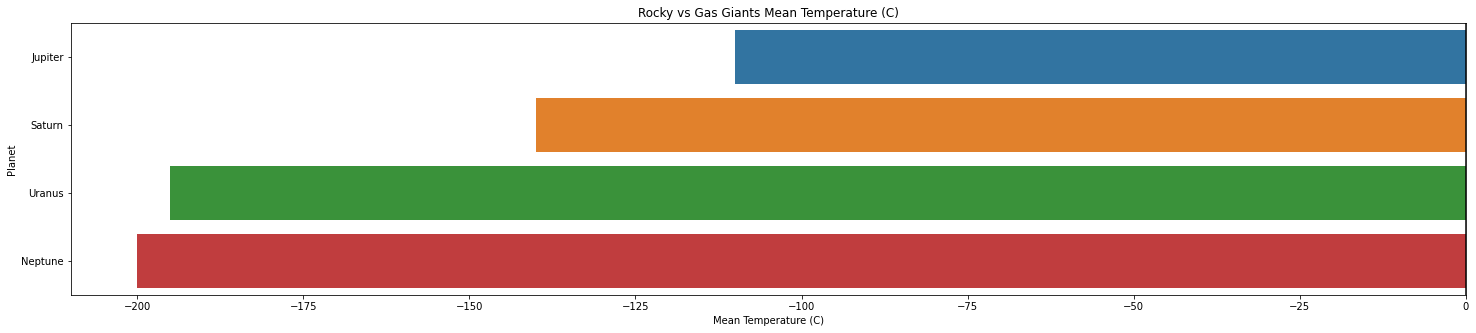

In [110]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Bar Plot
plt.figure(figsize=(25,5))
plt.title(f"Rocky vs Gas Giants {col}")
sns.barplot(y=names,x=values)
plt.axvline(0, color='k')
plt.show()

**The far you go from the sun, the cold you become.**

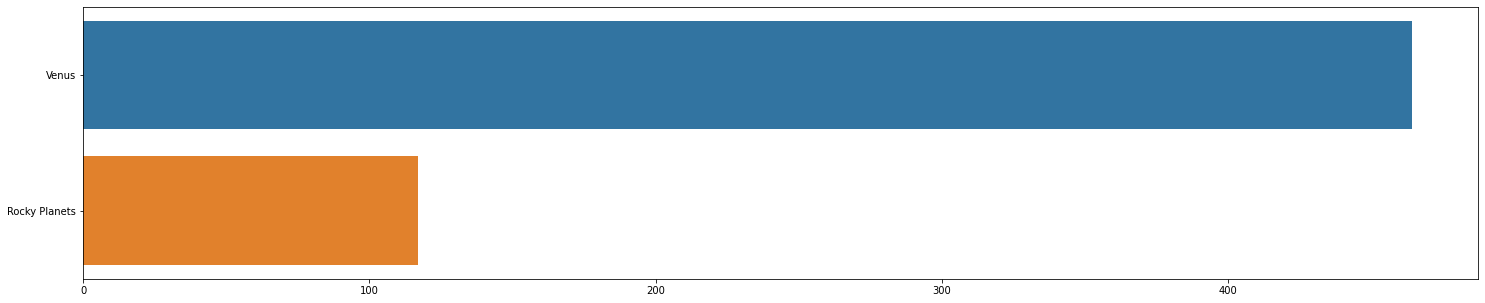

In [111]:
# Calculate
Venus = df[col][1]
other_rocky_planets = sum(df[col][:4]) - Venus

# Frame Values
names = ["Venus", "Rocky Planets"]
values = [Venus, other_rocky_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Venus vs Other Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

---

# **Surface Pressure**

In [112]:
col = 'Surface Pressure (bars)'

In [113]:
df[col] = df[col].map(lambda x: 0 if x=="Unknown" else float(x))

The **surface pressure** of the **gaseous planets** is unknown so we will be only focusing on the **rocky planets**.

In [114]:
# Calculate Values
names = df['Planet'][:4]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

Only **Venus** and **Earth** have some **significant value** of the **surface pressure** out of them **Venus** has the **highest surface pressure**.

# **Number of Moons**

In [115]:
col = 'Number of Moons'

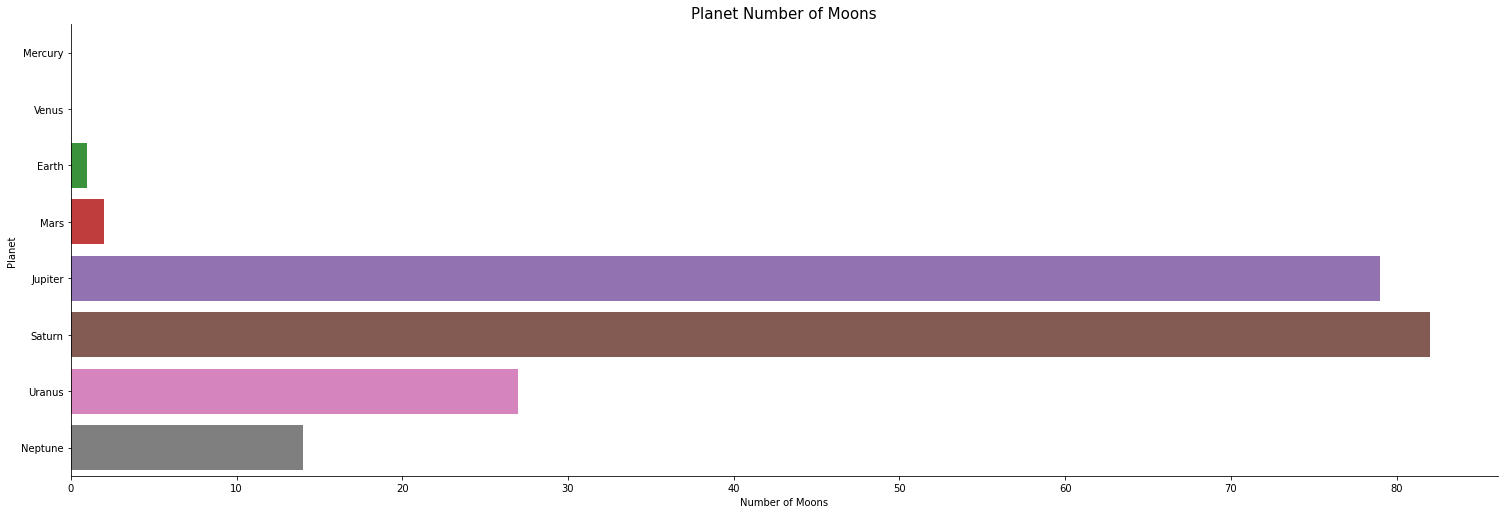

In [116]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

In [117]:
# Calculate Values
names = df['Planet']
values = df[col]

# Plot
fig = px.pie(names=names, values=values, title=f"Planet {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Saturn** alone accounts for **40% of the total number of moons**.

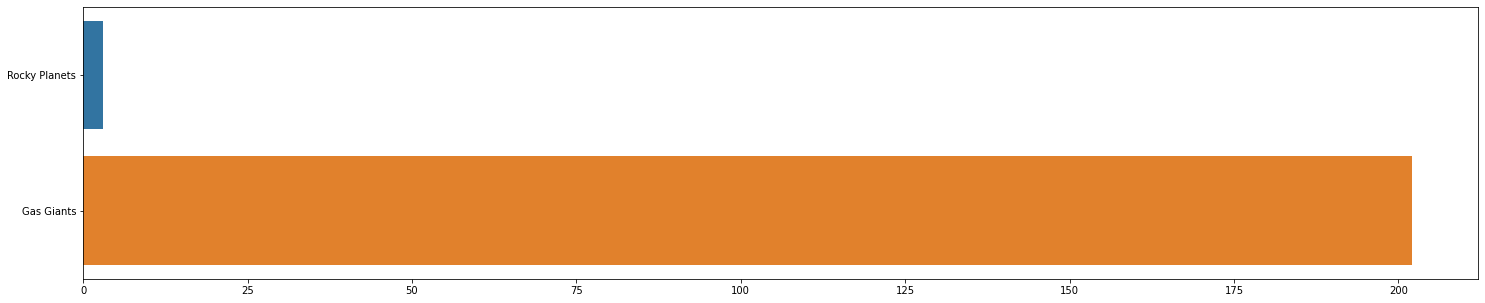

In [118]:
# Calculate
rocky_planets = sum(df[col][:4])
gas_planets = sum(df[col][4:])

# Frame Values
names = ["Rocky Planets", "Gas Giants"]
values = [rocky_planets, gas_planets]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky vs Gas Giants {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Gaseous planets** have a clear dominance over **rocky planets**.

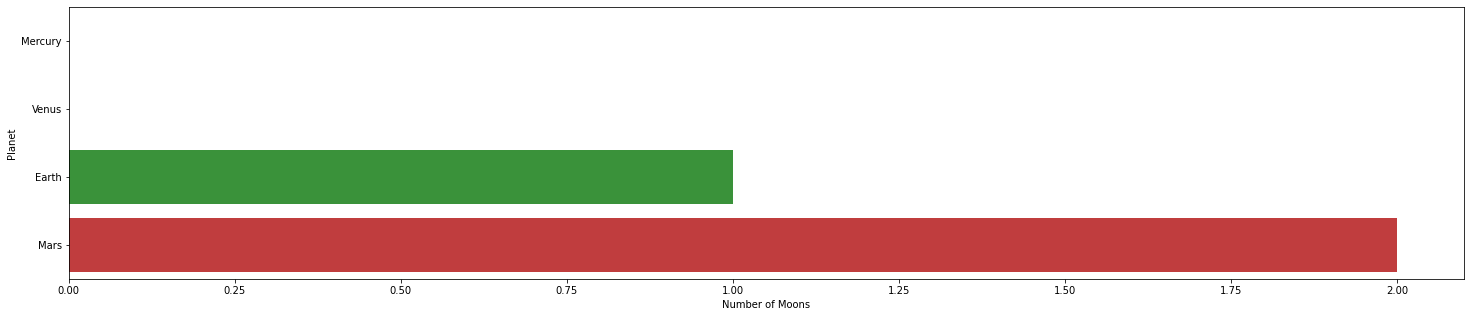

In [119]:
# Calculate Values
names = df['Planet'][df[col][:4].index]
values = df[col][:4]

# Plot
fig = px.pie(names=names, values=values, title=f"Rocky Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

Only **Earth and Mars** have moons among **rocky planets**.

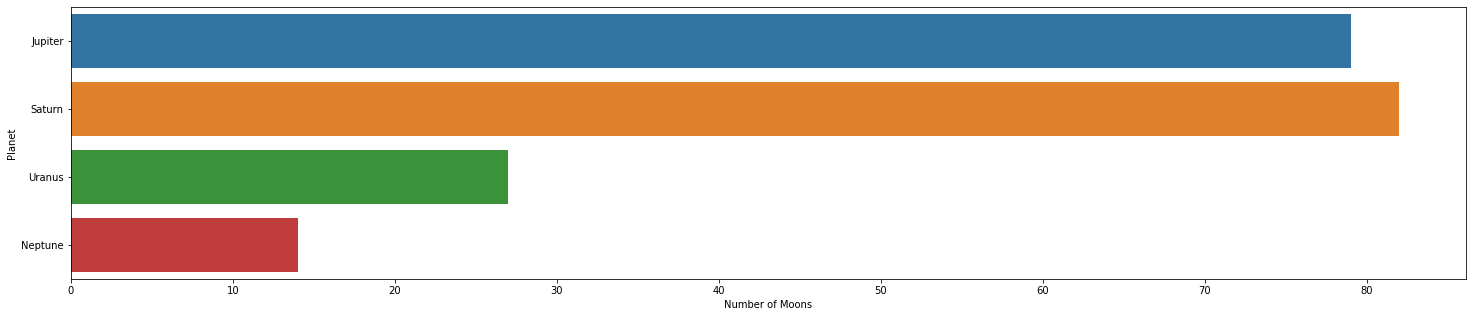

In [120]:
# Calculate Values
names = df['Planet'][df[col][4:].index]
values = df[col][4:]

# Plot
fig = px.pie(names=names, values=values, title=f"Gas Planets {col}", hole=0.3, height=600)
fig.update_layout({'title':{'x':0.48}})
fig.show()

# Bar Plot
plt.figure(figsize=(25,5))
sns.barplot(y=names,x=values)
plt.show()

**Saturn** has the **highest number of moons** followed by **Jupiter** and **Uranus**.

# **Other**

**Only Gas Giants have Rings.**

In [121]:
col = 'Ring System?'
df[col]

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
7    Yes
Name: Ring System?, dtype: object

In [122]:
col = 'Global Magnetic Field?'
df[col] = df[col].map(lambda x: 0 if x=='No' else 1)

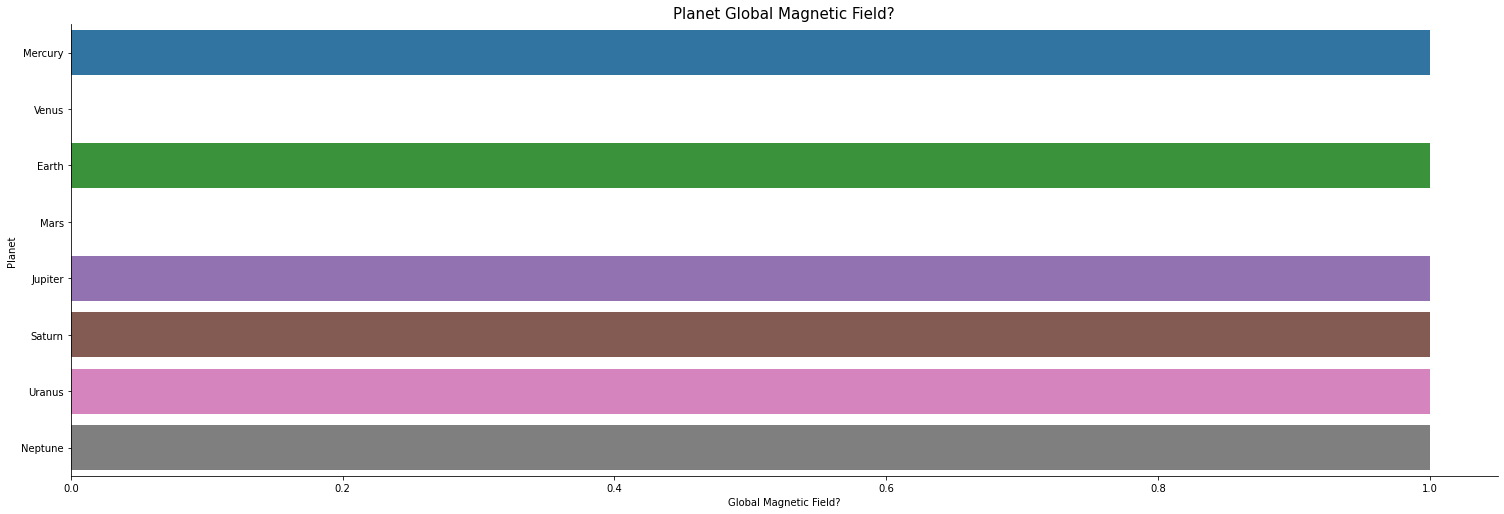

In [123]:
sns.catplot(
    data=df,
    y='Planet',
    x=col,
    kind='bar',
    aspect=3,
    height=7
)
plt.title(f"Planet {col}", fontsize=15)
plt.show()

**That was all the insights from my side**

**Thanks !!!**

---
**DeepNets**